<h5><font size="5">Análise de Dados</font><h5>
<h8><font size="3">Perfis e Relações Contratais dos Funcionários de uma Empresa Fictícia</font><h8>

<strong><font size="3">1.</font></strong>
<font size="3"> Importando as usuais bibliotecas utilizadas para operações com dados e a projeção destes.</font><br><br>
<strong>Operações</strong>: Pandas e Numpy.<br>
<strong>Projeção</strong>: Matplotlib e Seaborn.<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<strong><font size="3">2.</font></strong>
<font size="3"> Importando o Banco de Dados</font><br>

In [3]:
df = pd.read_csv('Case Analytics.csv')

<strong><font size="3">3.</font></strong>
<font size="3">Visualizando as colunas presentes no banco de dados</font>

In [4]:
df.columns
#Usar Clusthers para criar árvores com grupos

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

<strong><font size="4">4.</font></strong>
<font size="3.5">Em busca de analisar o perfil da empresa, foram projetados gráficos abaixo:</font>
<br><br>
<font size="3.5"><strong>Objetivo</strong>: Expor a situação da empresa analisada, a partir dos dados fornecidos, afim de retirar o máximo de informações relevantes possível</font><br>


<ul><strong><font size="3.5">4.1. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o Status dos Funcionários Registrados da Empresa, Isto Analisando a Idade de Cada Funcionário e o Tempo Que Atua/Atuou Na Empresa</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre os funcionários de acordo com o sexo, e diferenciando se os funcionários de cada sexo continuam trabalhando na empresa ou estão ausentes de seus cargos.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>
<ul><ul><font size="3">-Majoritamente em ambos os sexos, quanto maior é a idade do funcionário, maior é o seu tempo de serviço.</font> </ul></ul>
<ul><ul><font size="3">-Nota-se também uma maior presença de funcionários do sexo feminino, com maior tempo de serviço trabalhando atualmente na empresa, que do sexo masculino.</font></ul></ul>
<ul><font size="3"><strong>Suposições</strong>: Diante do gráfico exposto abaixo é possível estimar que:</font></ul>
<ul><ul><font size="3">-Nota-se de forma superficial que há mais funcionários do sexo feminino que masculino.</font></ul></ul>
<ul><ul><font size="3">-Nota-se de forma superficial que as pessoas que estão ausentes do cargo, em sua maioria apresentam pouco tempo de serviço na empresa, em ambos os sexos.</font></ul></ul>


/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


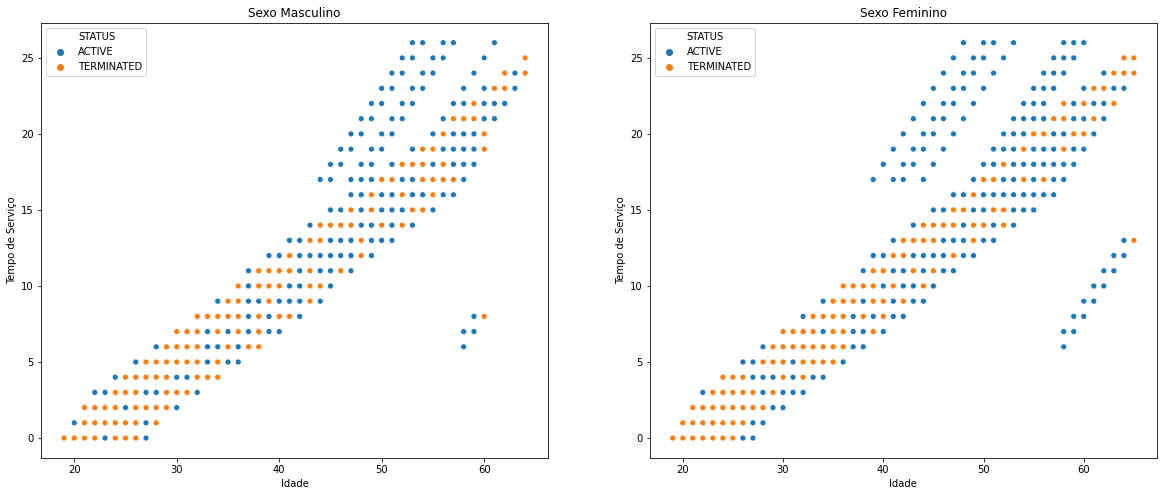

In [5]:

fig, ax = plt.subplots(1,2, figsize=(20,8))
ax2 = sns.scatterplot(x='age',y='length_of_service', data=df[df['gender_short']=='M'], ax=ax[0], hue='STATUS')
ax1 = sns.scatterplot(x='age',y='length_of_service', data=df[df['gender_short']=='F'], ax=ax[1], hue='STATUS')
ax[1].set_title("Sexo Feminino")
ax[0].set_title("Sexo Masculino")
ax1.set(ylabel='Tempo de Serviço', xlabel = 'Idade')
ax2.set(ylabel='Tempo de Serviço', xlabel = 'Idade')
sns.set(font_scale=1)

fig.savefig('plot1.png')
fig.show()


<ul><strong><font size="3.5">4.2. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funcionários) Registrados da Empresa, Isto Analisando o Ano de Contratação de Cada Funcionário e o Tempo Que Atuou/Atua Na Empresa.</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre o tempo de serviço e o ano de contratação de acordo como sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-É evidente que no gráfico  dos atuais funcionários, quanto mais antigo é o ano de contrato, maior é o seu respectivo tempo de serviço.</font> </ul></ul>

<ul><ul><font size="3">-Nota-se que a distribuição, no gráfico dos atuais funcionários, em relação ao gênero se mostra em proporções quase igualitárias.</font></ul></ul>

<ul><ul><font size="3">-Nota-se que há certos padrões de gênero no gráfico de antigos funcionários, quanto ao ano de contratação dos antigos funcionários: </font></ul></ul>


<ul><ul><ul><font size="3">-Há somente antigos funcionários do sexo feminino contratadas nos seguintes anos: 1993, 1995-1997, 2005, 2012.</font></ul></ul></ul>
<ul><ul><ul><font size="3">-Há somente antigos funcionários do sexo masculino contratados nos seguintes anos: 1990-1992, 1998-2003, 2008, 2009, 2011.</font></ul></ul></ul>

<ul><font size="3"><strong>Suposições</strong>: Diante do gráfico exposto abaixo é possível estimar que:</font></ul>

<ul><ul><font size="3">-Nota-se de forma superficial que há mais funcionários do sexo feminino que masculino.</font></ul></ul>

<ul><ul><font size="3">-Nota-se de forma superficial que as pessoas que estão ausentes do cargo, em sua maioria são do sexo masculino.</font></ul></ul>
    <br>


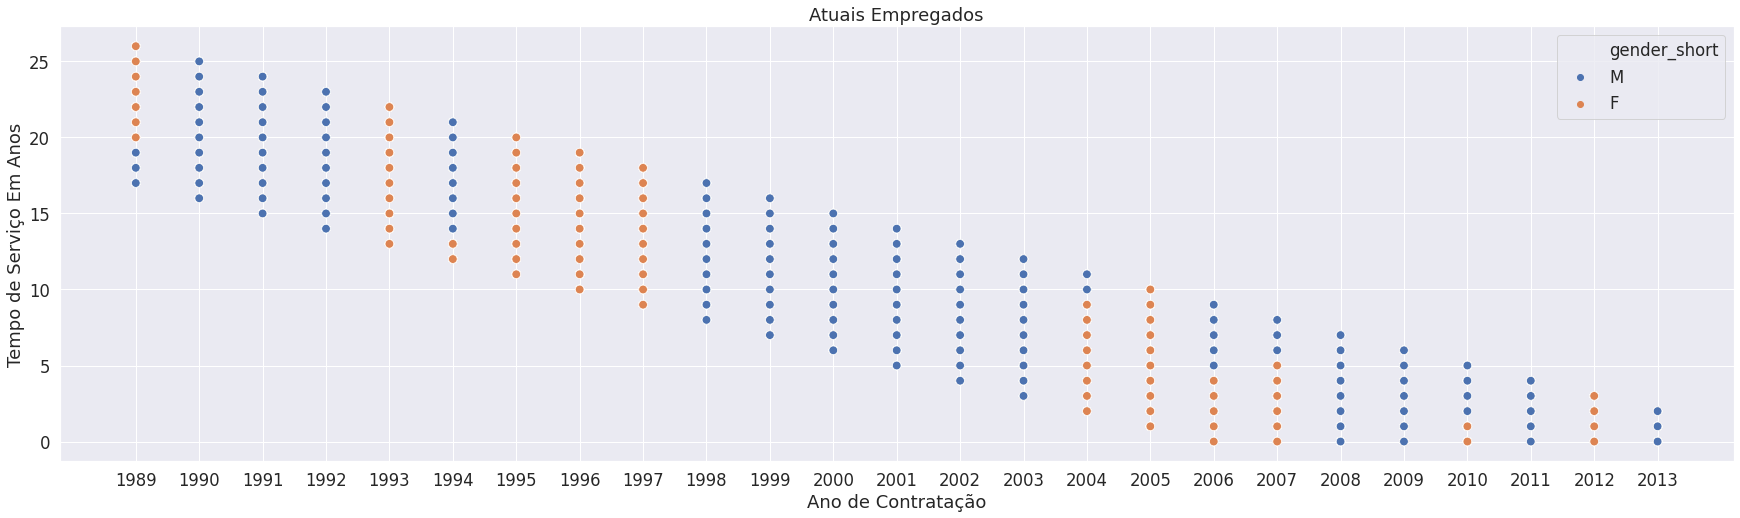

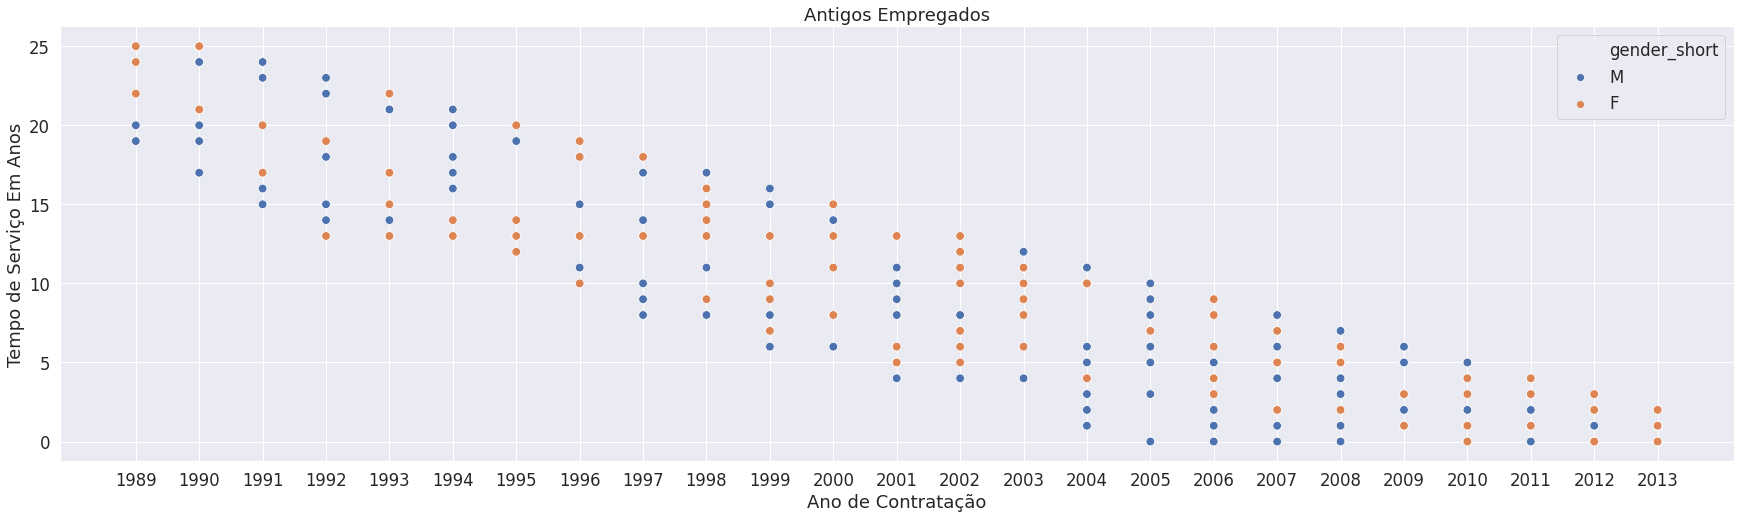

In [6]:
AnoDeContratacao=[]
for x in range(len(df)):
    AnoDeContratacao.append(df.loc[x, 'orighiredate_key'].split('/')[2])
df['year_of_contracting'] = AnoDeContratacao
plt.figure(figsize=(30,8))

sns.set(font_scale=1.5)
sns.scatterplot(x='year_of_contracting',y='length_of_service', 
                      data=df[df['STATUS']=='ACTIVE'], hue='gender_short',s=75)
plt.title("Atuais Empregados")
plt.ylabel('Tempo de Serviço Em Anos')
plt.xlabel('Ano de Contratação')
plt.savefig('plot2A.png')
plt.figure(figsize=(30,8))

sns.set(font_scale=1.5)
sns.scatterplot(x='year_of_contracting',y='length_of_service', 
                      data=df[df['STATUS']!='ACTIVE'], hue='gender_short',s=75)
plt.title("Antigos Empregados")
plt.ylabel('Tempo de Serviço Em Anos')
plt.xlabel('Ano de Contratação')
plt.savefig('plot2B.png')


<ul><strong><font size="3.5">4.3. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funcionários) Registrados da Empresa, Isto Analisando o Ano de Contratação de Cada Funcionário e o Número de Funcionários Contratados</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre o número de funcionários, de cada funcionário por <i>status</i>, gênero e sobre o seu respectivo ano de contratação.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-É evidente que no gráfico  dos atuais funcionários, quanto mais antigo é o ano de contrato, maior é o seu respectivo tempo de serviço.</font> </ul></ul>

<ul><ul><font size="3">-Que a distribuição, no gráfico dos atuais funcionários, em relação ao gênero de mostra que a maior quantidade foi contratada nos anos: 2000, 1995 e 1998.</font></ul></ul>

<ul><ul><font size="3">-Que as baixas de antigos funcionários se dão nos anos: 1991 e de 2001 até 2006.</font></ul></ul>
<br>


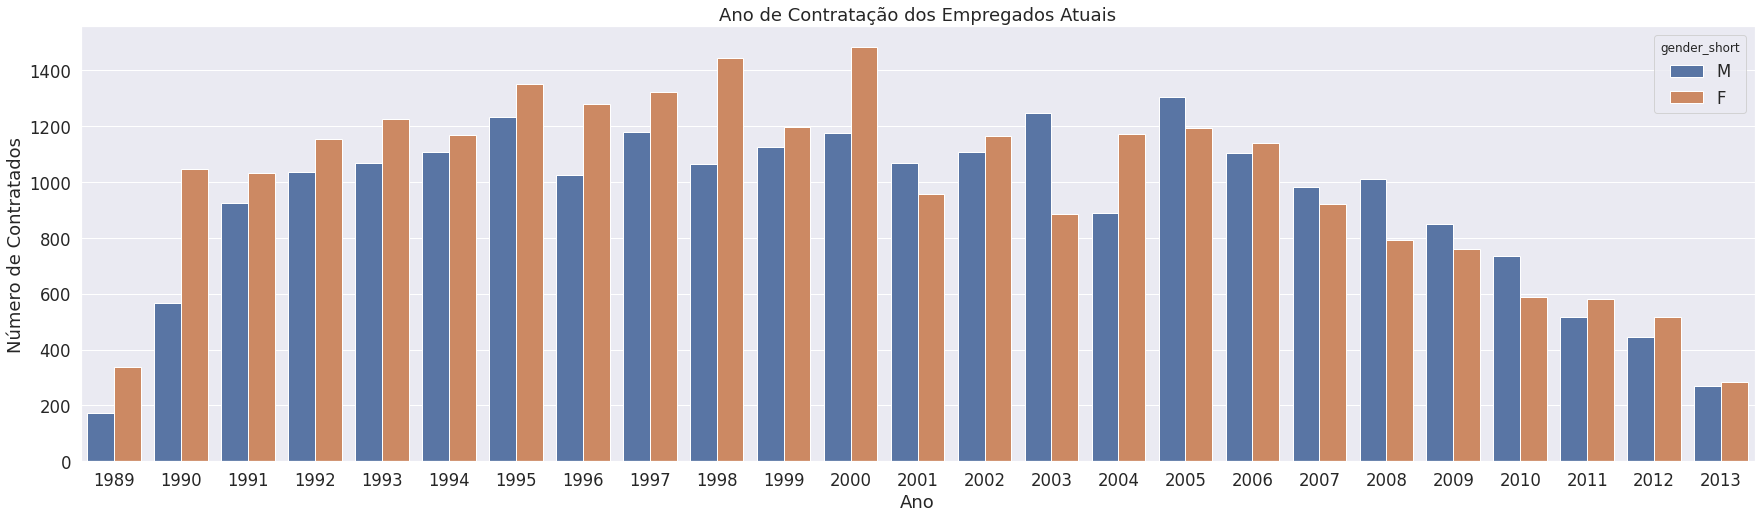

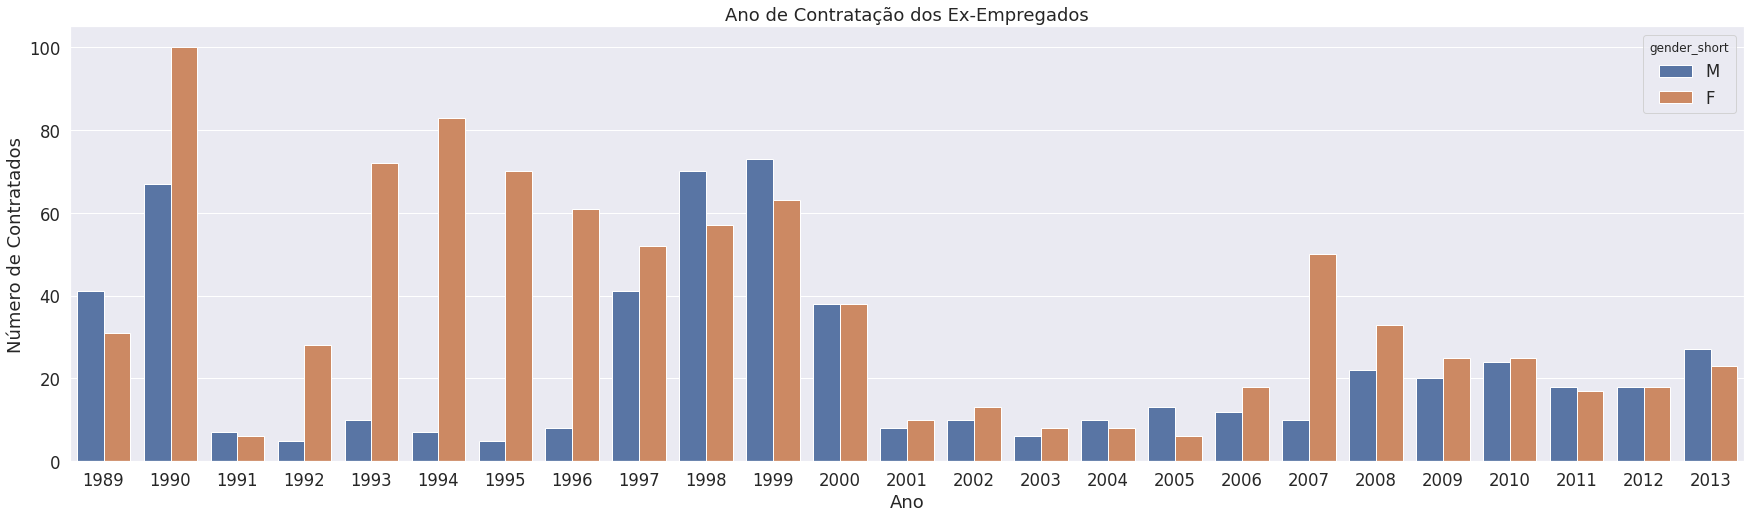

In [7]:
for x in range(len(df['orighiredate_key'])):
    df.loc[x,'year_of_contratation'] = df.loc[x,'orighiredate_key'].split('/')[2]
    
plt.figure(figsize=(30,8))
sns.countplot(x='year_of_contratation', data=df[df['STATUS']=='ACTIVE'], 
                    hue='gender_short')
plt.title("Ano de Contratação dos Empregados Atuais")
plt.xlabel("Ano")
plt.ylabel('Número de Contratados')
plt.savefig('plot3A.png')
sns.set(font_scale=1.5)

plt.figure(figsize=(30,8))
sns.countplot(x='year_of_contratation', data=df[df['STATUS']!='ACTIVE'], 
                    hue='gender_short')
plt.title("Ano de Contratação dos Ex-Empregados")
plt.xlabel("Ano")
plt.ylabel('Número de Contratados')
plt.savefig('plot3B.png')
sns.set(font_scale=1.5)


<ul><strong><font size="3.5">4.4. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funciários) Registrados da Empresa, Isto Analisando o Ano de Contratação de Cada Funcionário e a Idade que Este o Tinha Quando foi Contratado</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a idade e o ano de contratação de acordo como sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-O índice de idades quando contratados de forma geral mudaram ao longo dos anos:</font> </ul></ul>

<ul><ul><ul><font size="3">-1989: Foram contratados pessoas de até 45 anos.</font></ul></ul></ul>
<ul><ul><ul><font size="3">-1990-1991: Foram contratados pessoas de 30 até 35 anos aproximadamente.</font></ul></ul></ul>
<ul><ul><ul><font size="3">-1992-2000: Foi ao mesmo tempo, aumentando gradativamente a presença de funcionários acima dos 40, em sua maioria do sexo feminino; ao mesmo tempo em que foram contratadas pessoas cada vez mais jovens, na faixa dos 25-35 anos.</font></ul></ul></ul>
<ul><ul><ul><font size="3">-2001-2013: Foi diminuindo cada vez mais a idade de contratação ao longo dos anos, chegando a uma média de 18 até 25 anos, e também foi diminuindo o número de pessoas contratadas, algo já mencionado anteriormente.</font></ul></ul></ul>

<ul><ul><font size="3">-Há uma presença maior de antigos funcionários, em aqueles contratados após o ano 2000, que os contratados anteriormente, o que significa que a maioria dos funcionários contratados de 1989 até o ano 2000 ainda continuam trabalhando na empresa.</font></ul></ul>
<br>

In [ ]:
for x in range(len(df['age'])-1):
    df.loc[x,'age_of_contratation'] = int(df.loc[x,'age']) - (
        int(df['year_of_contratation'].max()) - int(df.loc[x,'year_of_contratation']))

plt.figure(figsize=(30,20))
sns.scatterplot(x='year_of_contratation', y='age_of_contratation',data=df, 
                      hue='gender_short',s=75)
plt.xlabel("Ano")
plt.ylabel('Idade Quando Contratado(a)')
plt.title("Ano de Contratação dos Todos Empregados Por Idade ")
plt.savefig('plot4A.png')
sns.set(font_scale=1.5)



In [ ]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='year_of_contratation', y='age_of_contratation',data=df[df['STATUS']=='ACTIVE'], 
                      hue='gender_short',s=75)
plt.xlabel("Ano")
plt.ylabel('Idade Quando Contratado(a)')
plt.title("Ano de Contratação dos Antigos Empregados Por Idade")
plt.savefig('plot4B.png')
sns.set(font_scale=1.5)

In [ ]:

plt.figure(figsize=(30,20))
sns.scatterplot(x='year_of_contratation', y='age_of_contratation', data=df[df['STATUS']!='ACTIVE'], 
                      hue='gender_short',s=75)
plt.title("Ano de Contratação dos Empregados Atuais Por Idade")
plt.xlabel("Ano")
plt.ylabel('Idade Quando Contratado(a)')
sns.set(font_scale=1.5)
plt.savefig('plot4C.png')

<ul><strong><font size="3.5">4.5. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funciários) Registrados da Empresa, Isto Analisando Número de Cada Funcionário por Departamento da Empresa</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre departamentos de acordo com o número, sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Quanto ao número de funcionários na empresa atualmente, há departamentos que possuem abundância quanto ao seu número de funcionários, já outros que tem pouquíssimas pessoas trabalhando.</font> </ul></ul>
<ul><ul><font size="3">-Em sua maioria, nos departamentos que são mais abundantes em pessoas, os empregados decrementados em sua maioria são são do sexo feminino.</font> </ul></ul>



<ul><font size="3"><strong>Suposições</strong>: Diante do gráfico exposto abaixo é possível estimar que :</font></ul>

<ul><ul><font size="3">-Que os departamentos com menos pessoas são do <i>Head Office</i> (escritório).</font></ul></ul>


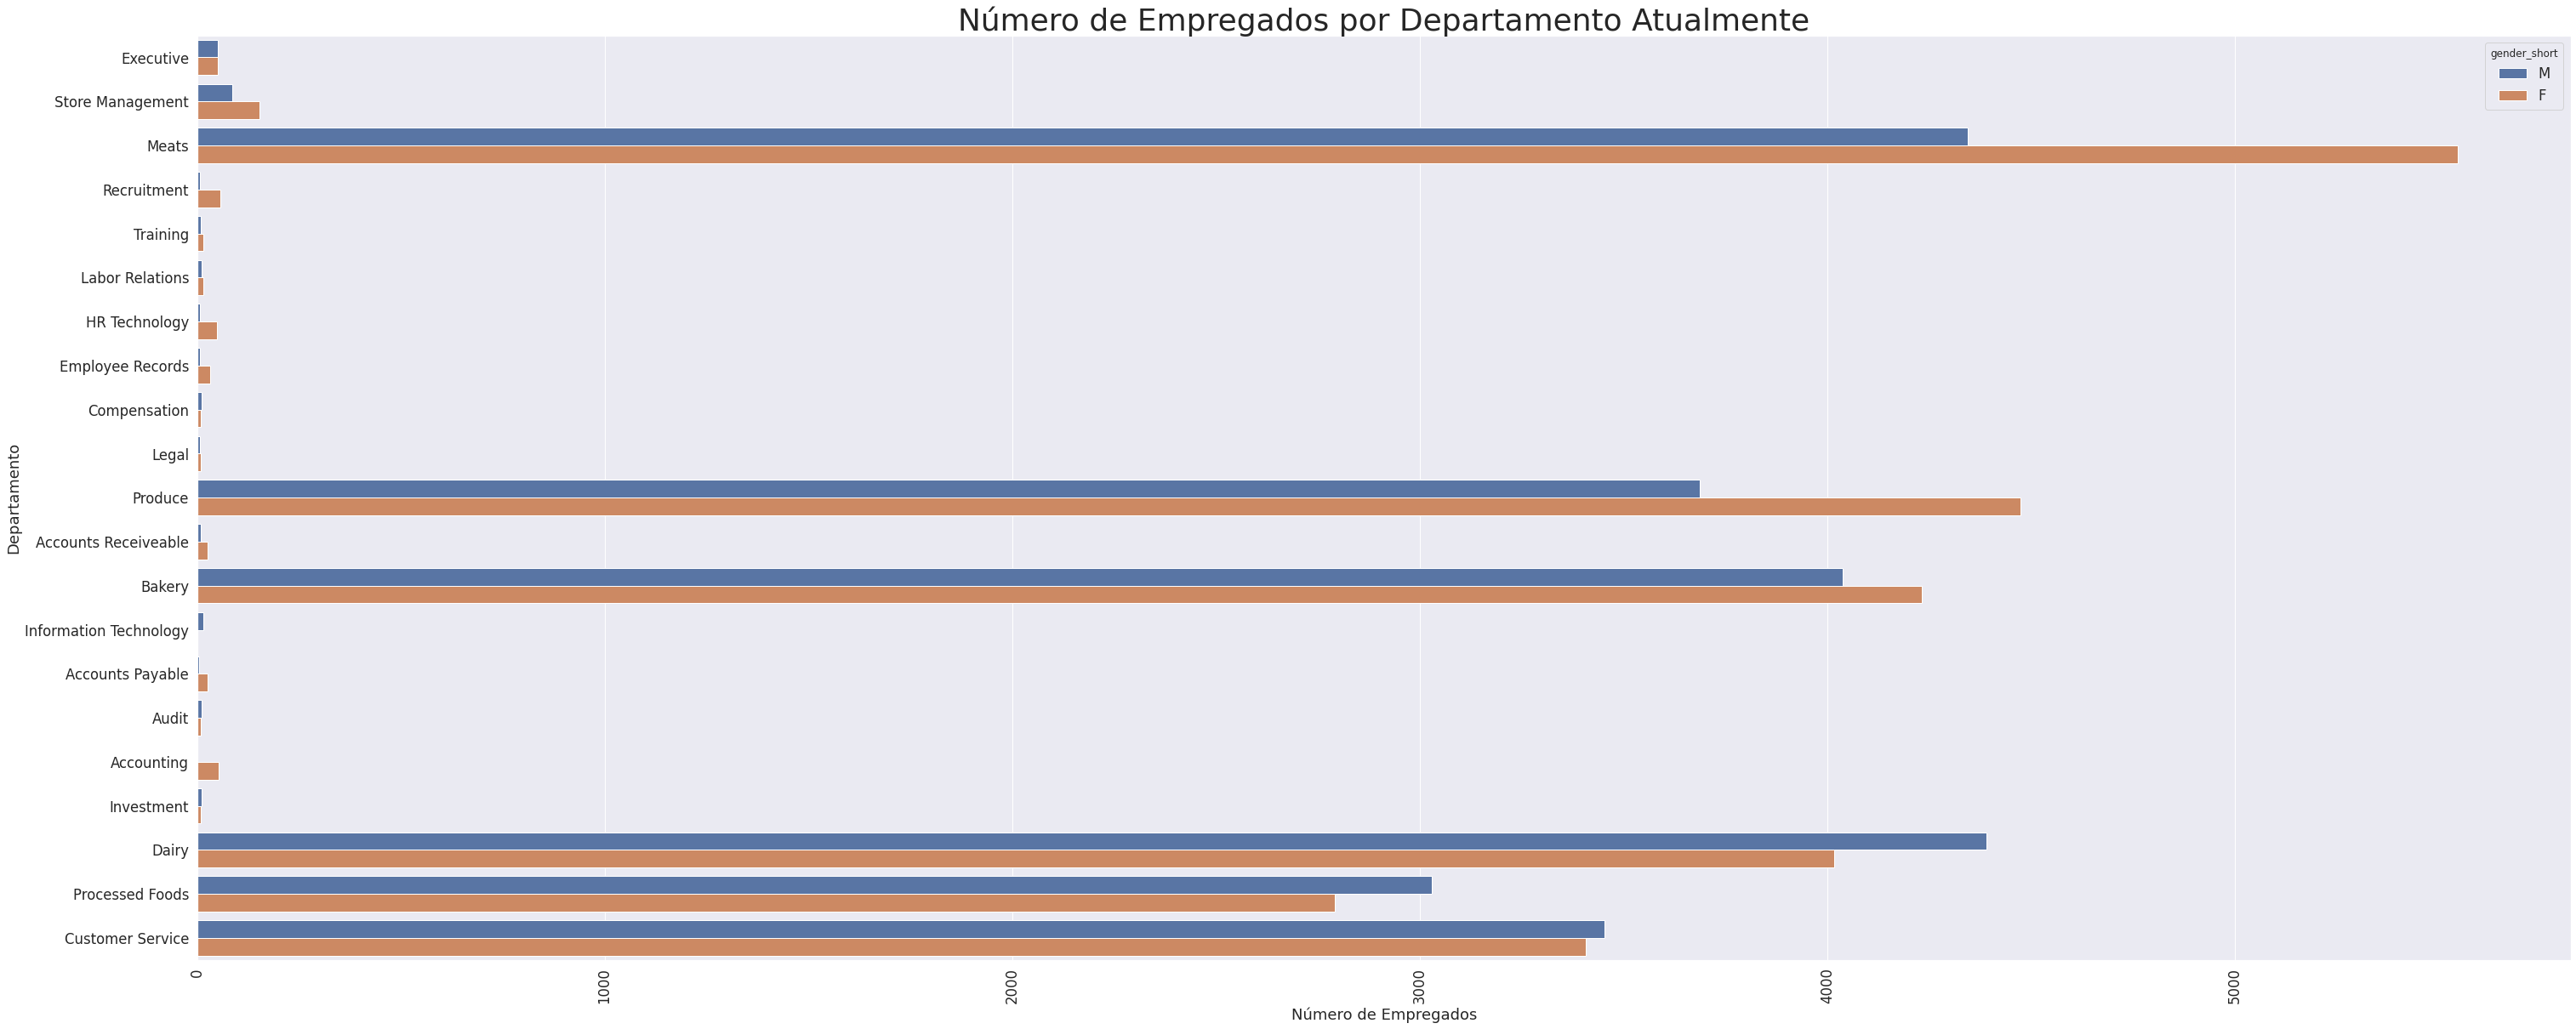

In [8]:
plt.figure(figsize=(50,20))

sns.countplot(y='department_name', data=df[df['STATUS']=='ACTIVE'],hue='gender_short')
sns.set(font_scale=3)
plt.xticks(rotation=90)
plt.title("Número de Empregados por Departamento Atualmente")
plt.ylabel('Departamento')
plt.xlabel('Número de Empregados')
plt.savefig('plot5A.png')

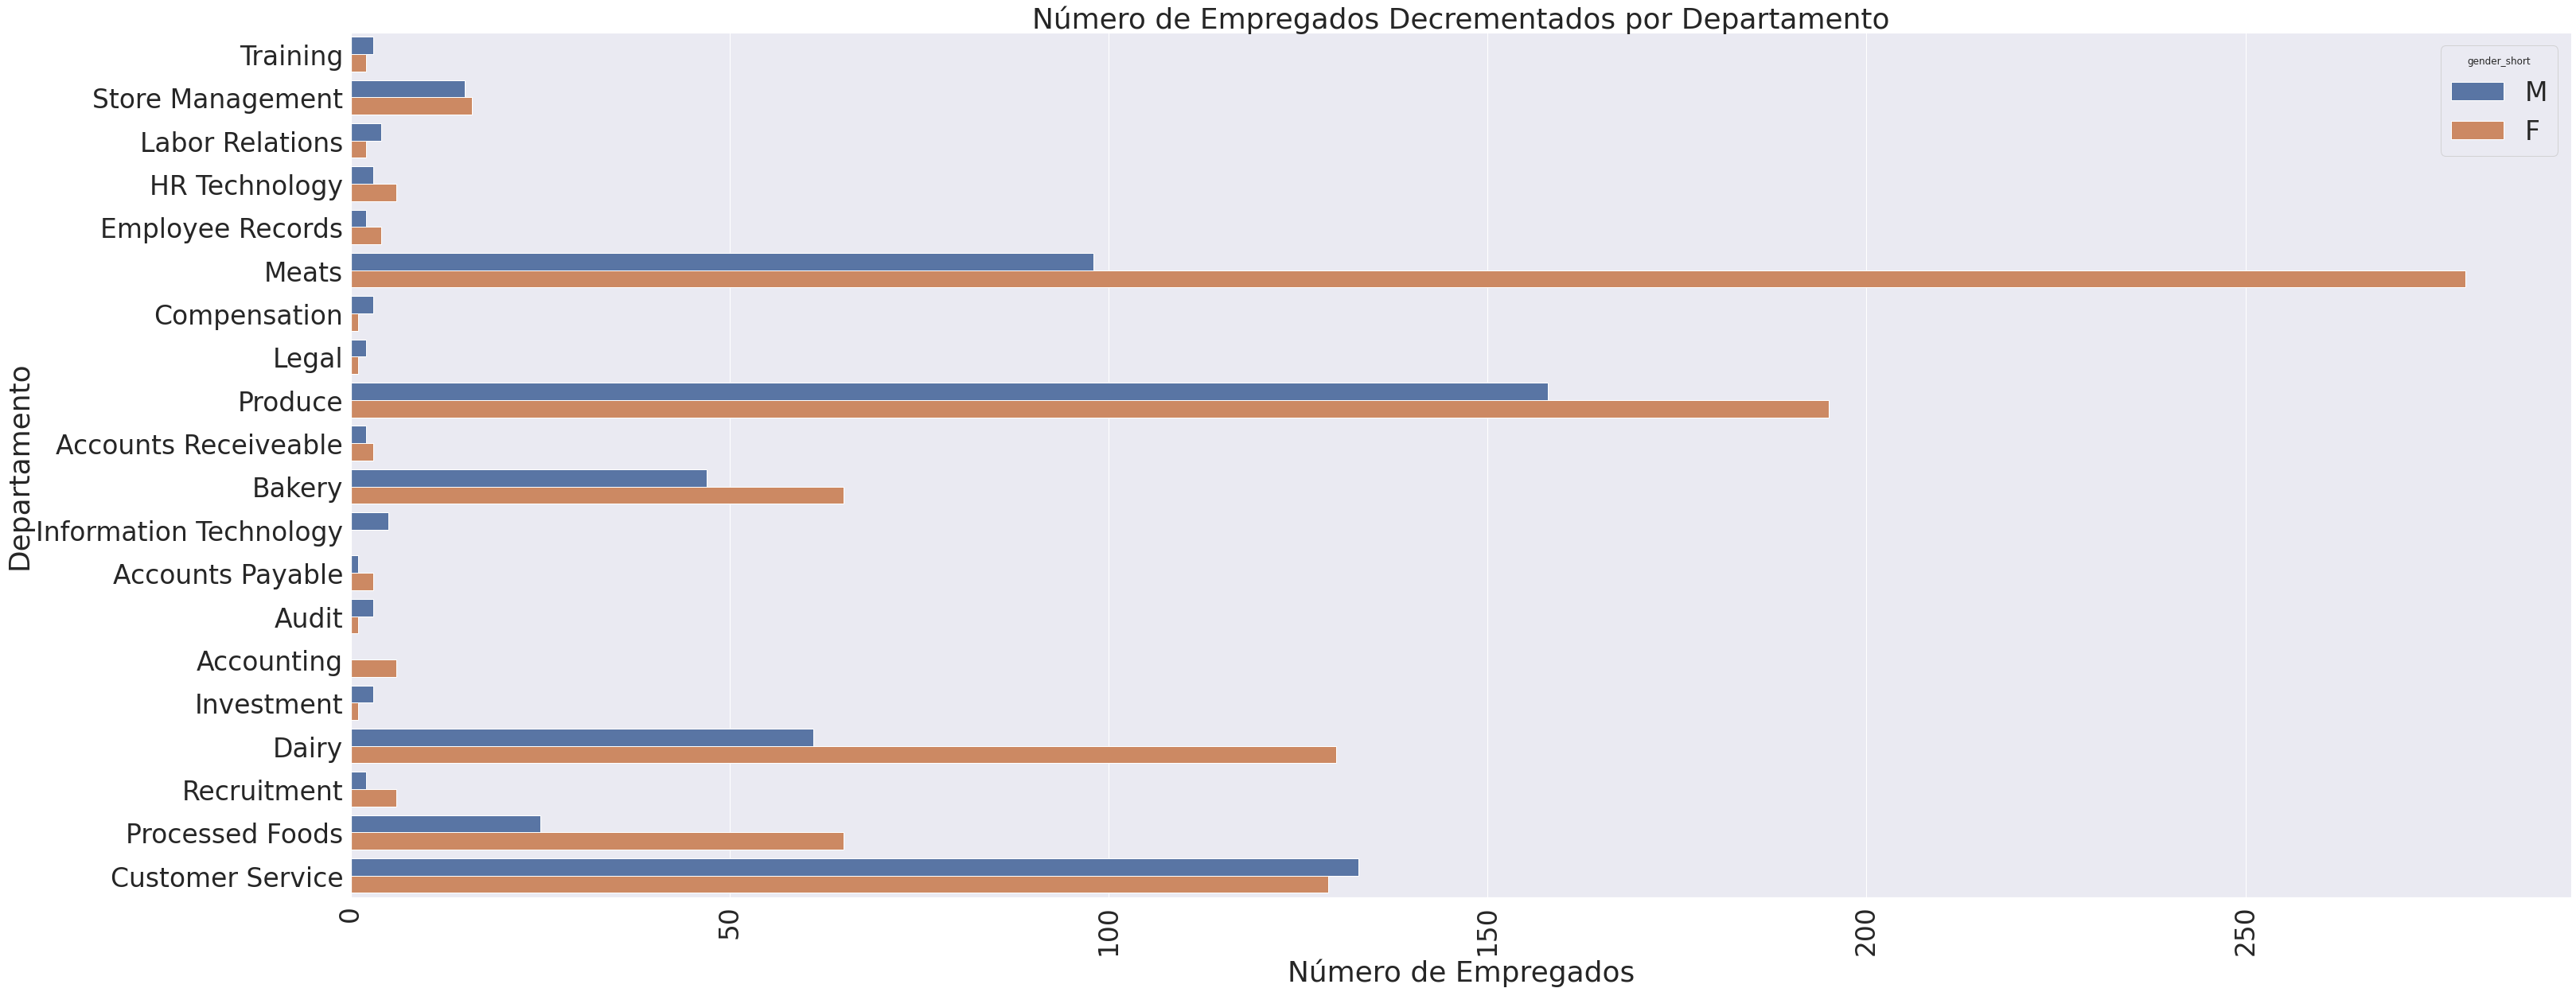

In [11]:


plt.figure(figsize=(50,20))
sns.countplot(y='department_name',data=df[df['STATUS']!='ACTIVE'],hue='gender_short')
sns.set(font_scale=3)
plt.xticks(rotation=90)
plt.title("Número de Empregados Decrementados por Departamento")
plt.ylabel('Departamento')
plt.xlabel('Número de Empregados')
plt.savefig('plot5B.png',)


<ul><strong><font size="3.5">4.6. </font></strong>
<font size="3.5">Análise Comparativa Entre A Unidade da Empresa e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funcionários) Registrados da Empresa, Isto Analisando Número de Cada Funcionário por Departamento da Empresa</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre departamentos de acordo com o número,unidade e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Quanto ao número de funcionários na empresa atualmente,há departamentos que possuem abundância quanto ao seu número de funcionários, já outros que tem pouquíssimas pessoas.</font> </ul></ul>
<ul><ul><font size="3">-Os departamentos mais abundantes em pessoas são os da <i>Store</i>(loja), e os com menos pessoas são os referentes ao <i>Head Office</i> (escritório).</font> </ul></ul>

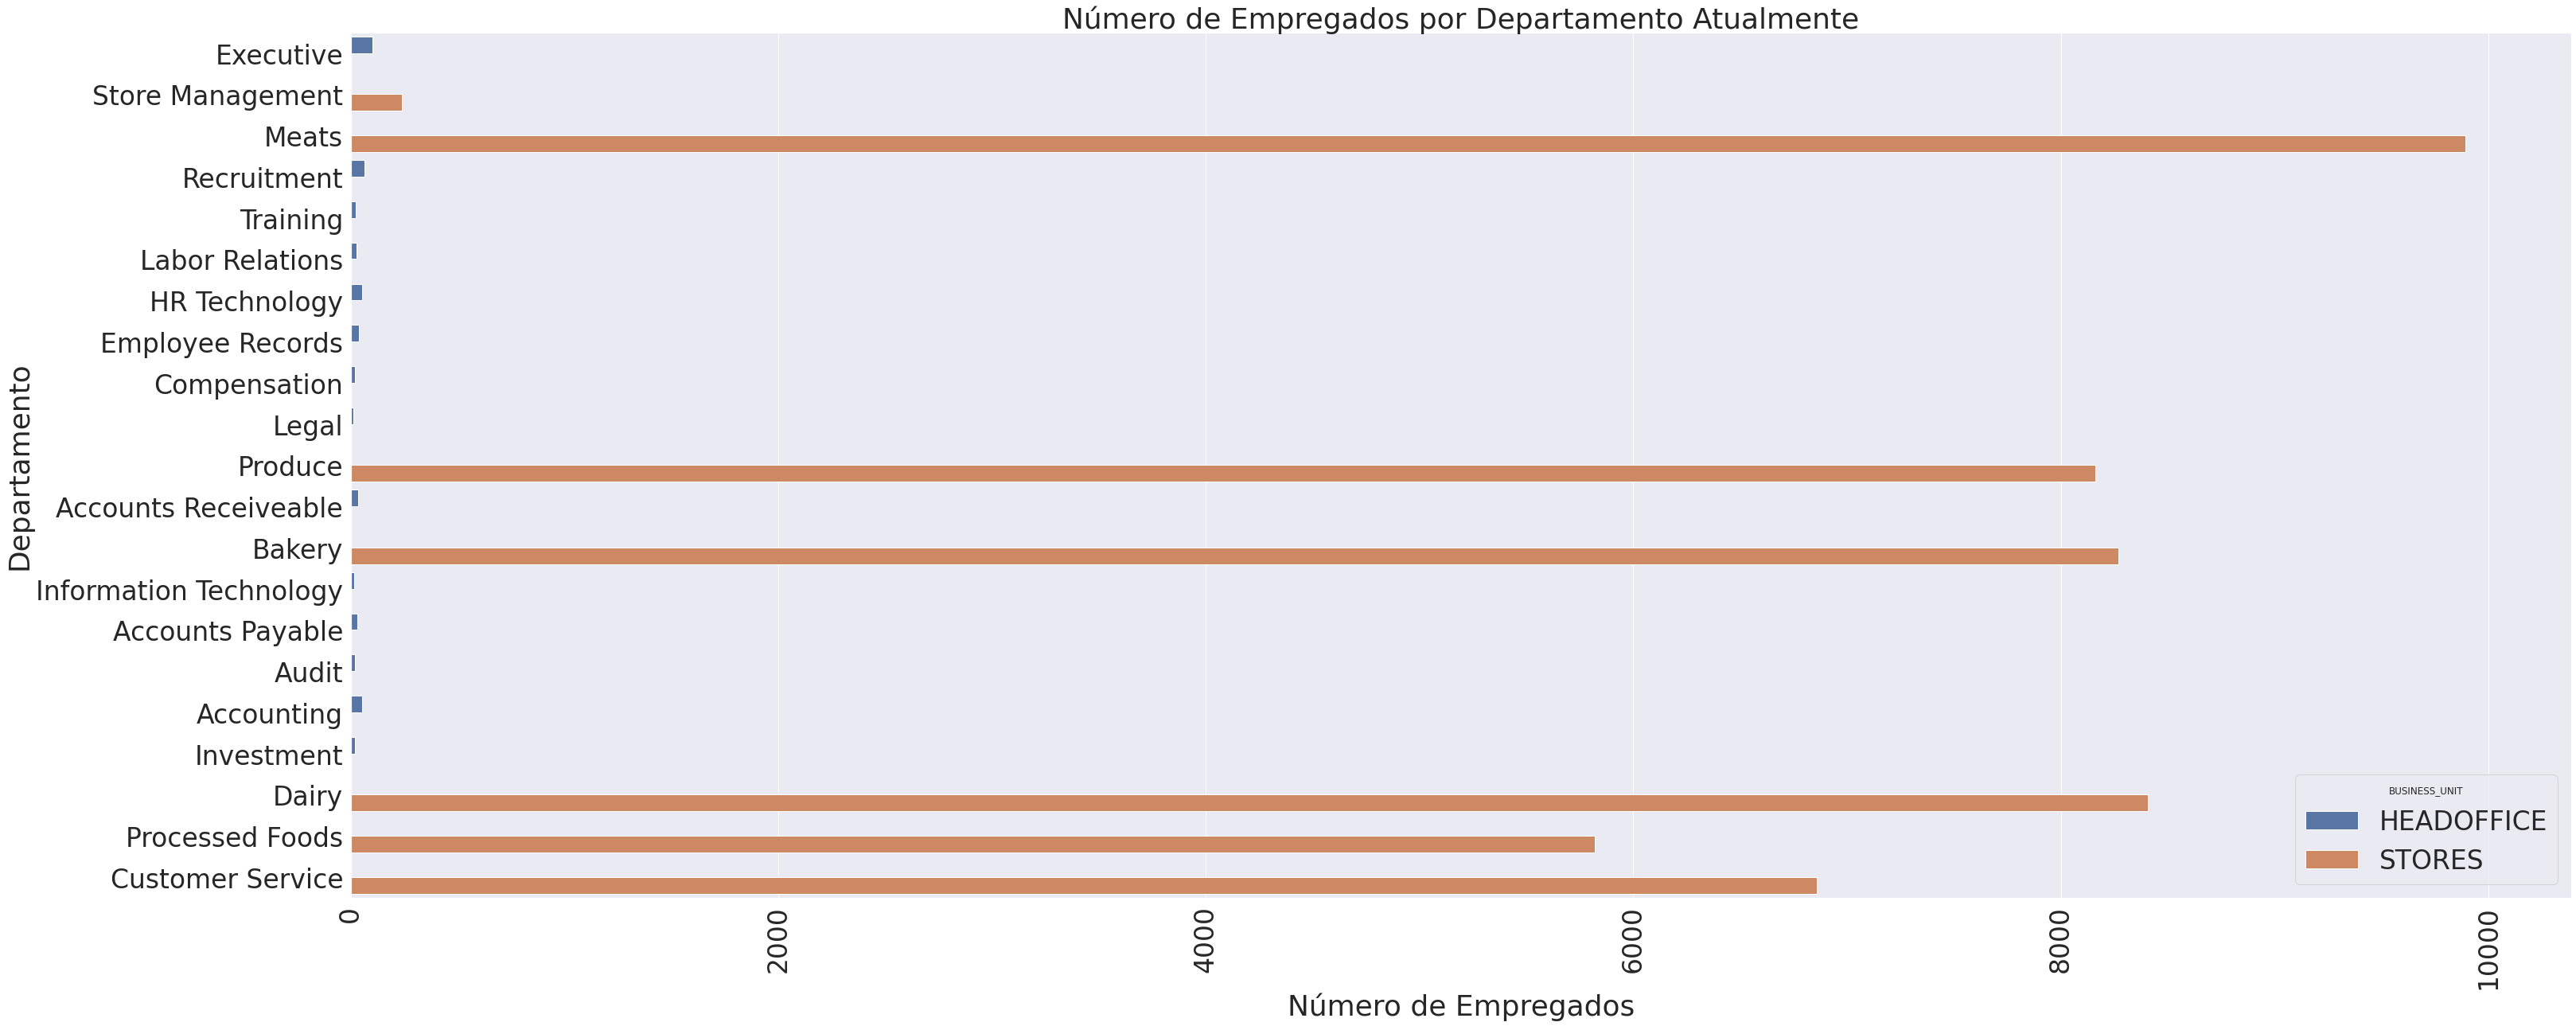

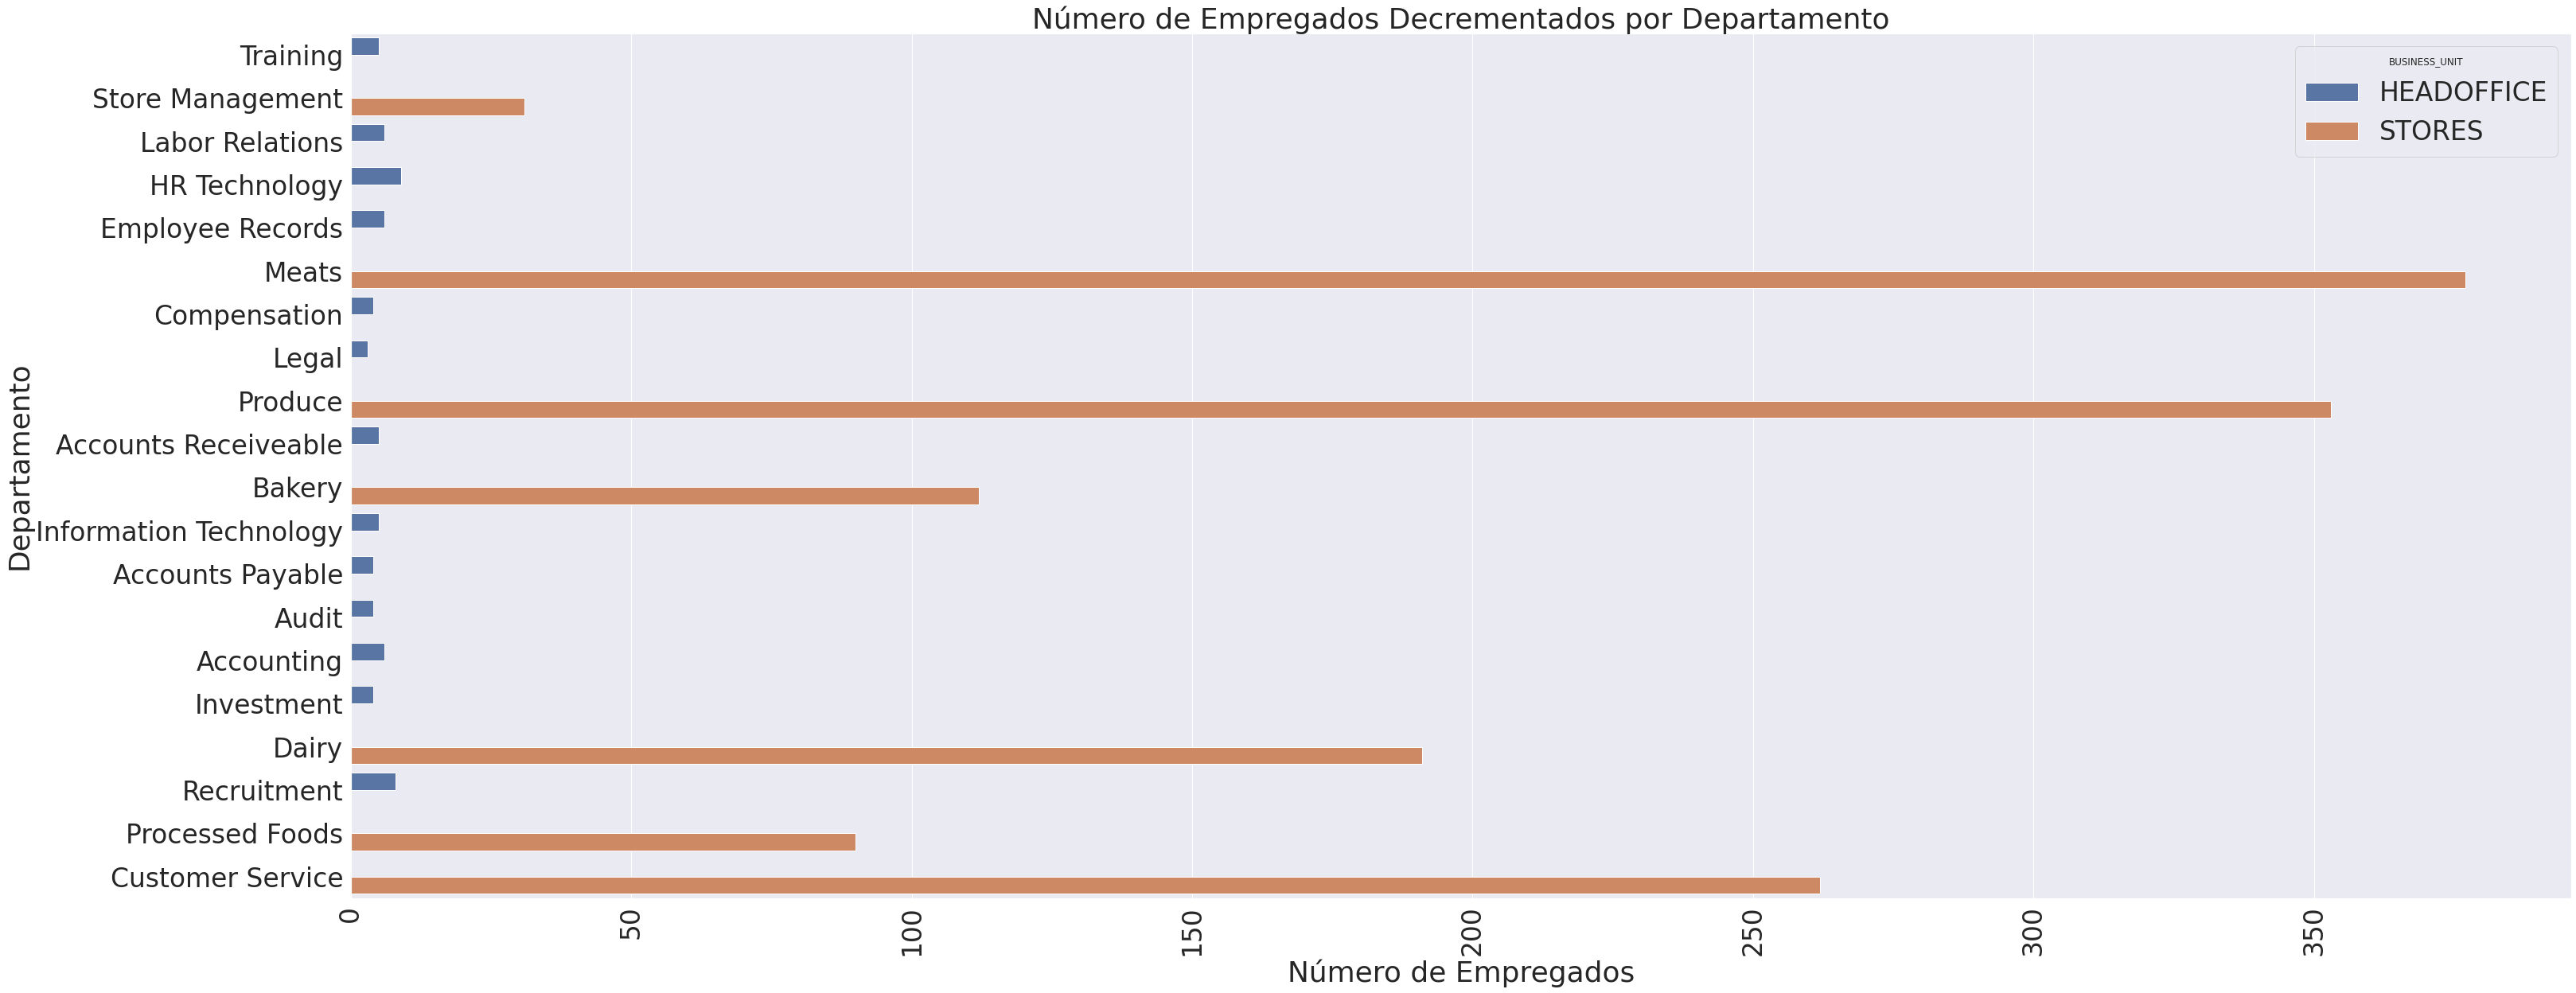

In [12]:

plt.figure(figsize=(50,20))
sns.countplot(y='department_name', data=df[df['STATUS']=='ACTIVE'], hue='BUSINESS_UNIT')
sns.set(font_scale=3.0)
plt.xticks(rotation=90)
plt.title("Número de Empregados por Departamento Atualmente")
plt.ylabel('Departamento')
plt.xlabel('Número de Empregados')
plt.savefig('plot6A.png')

plt.figure(figsize=(50,20))
sns.countplot(y='department_name',data=df[df['STATUS']!='ACTIVE'],hue='BUSINESS_UNIT')
sns.set(font_scale=3.0)
plt.xticks(rotation=90)
plt.title("Número de Empregados Decrementados por Departamento")
plt.ylabel('Departamento')
plt.xlabel('Número de Empregados')
plt.savefig('plot6B.png')


<ul><strong><font size="3.5">4.7. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funciários) Registrados da Empresa, Isto Analisando a Idade de Cada Funcionário por Departamento da Empresa</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre departamentos de acordo com a idade, o sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Com relação aos atuais funcionários da empresa:</font> </ul></ul>
<ul><ul><ul><font size="3">-Departamentos com Variadas Faixa Etárias a Partir dos 18 anos: Dairy, Bakery, Produce, Processed Foods, Customer Service, Meats.</font> </ul></ul></ul>

<ul><ul><ul><font size="3">-Departamentos com Funcionários a Partir dos 40 Anos: Executive, Store Management,Recruitment.</font> </ul></ul></ul>

<ul><ul><ul><font size="3">-Departamentos com Funcionários a Partir dos 55 Anos: Training, Labor Relations, HR Technology, Employee Records, Compensation, Legal, Accounts Receiveable,Information Technology, Accounts Payable, Audit, Accounting, Investment.</font> </ul></ul></ul>

<ul><ul><font size="3">-Com relação aos antigos funcionários da empresa, estes apresentam idades variadas, não ocorrendo uma padrão de concentração de antigos funcionários em nenhuma faixa etária.</font> </ul></ul>






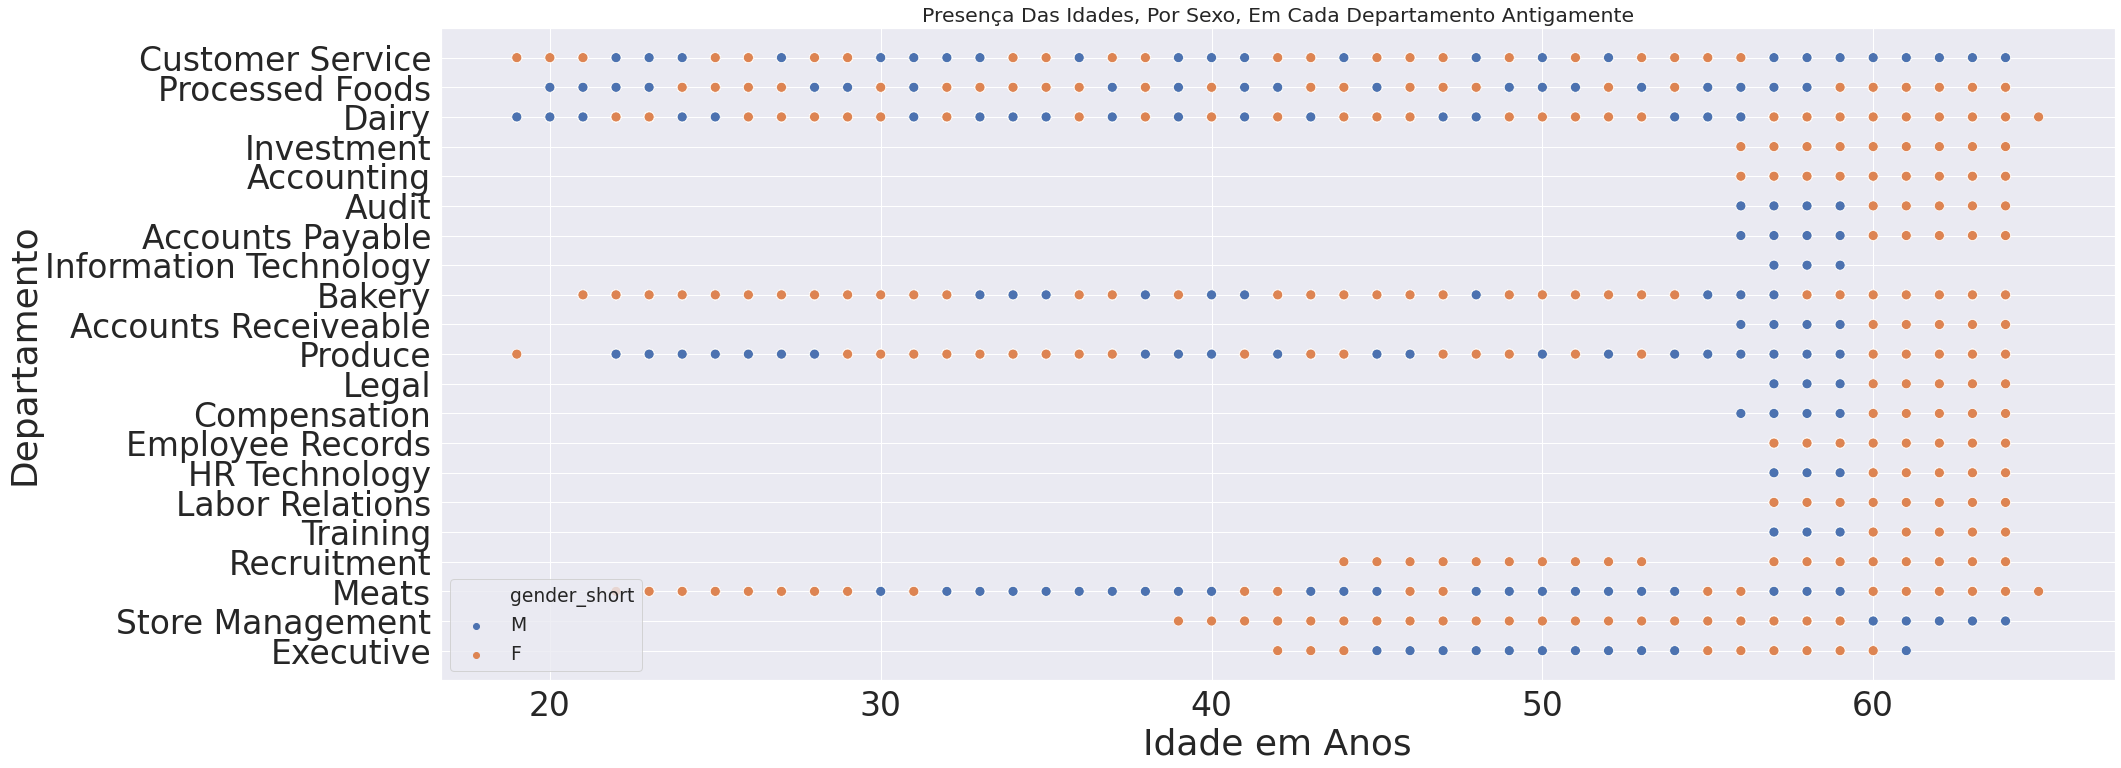

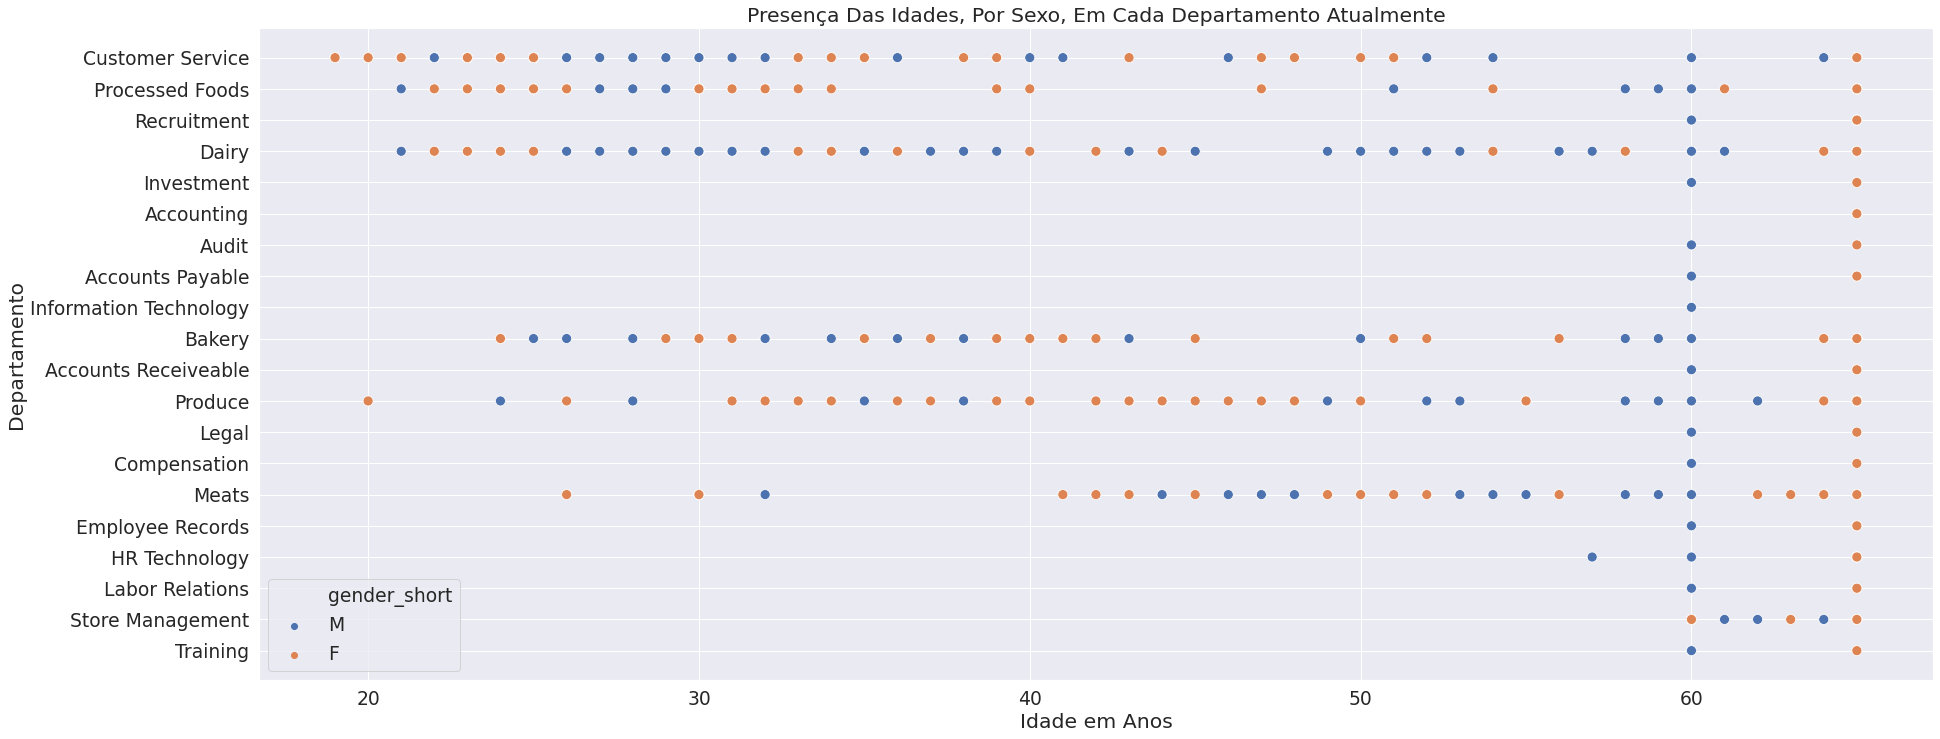

In [13]:
plt.figure(figsize=(30,12))

sns.scatterplot(y='department_name',x='age',data=df[df['STATUS']=='ACTIVE'], 
                        hue='gender_short',s=100)
sns.set(font_scale=1.7)
plt.title("Presença Das Idades, Por Sexo, Em Cada Departamento Antigamente")
plt.ylabel('Departamento')
plt.xlabel('Idade em Anos')
plt.legend(loc='lower left')
plt.savefig('plot7A.png')

plt.figure(figsize=(30,12))
sns.scatterplot(y='department_name',x='age',data=df[df['STATUS']!='ACTIVE'],
                      hue='gender_short',s=100)
sns.set(font_scale=1.7)
plt.title("Presença Das Idades, Por Sexo, Em Cada Departamento Atualmente")
plt.ylabel('Departamento')
plt.xlabel('Idade em Anos')
plt.legend(loc='lower left')
plt.savefig('plot7B.png')

<ul><strong><font size="3.5">4.8. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funciários) Registrados da Empresa, Isto Analisando o Número de Funcionários por Cidade</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre as cidade de acordo com a quantidade de funcionários, o sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Com relação aos atuais funcionários da empresa:</font> </ul></ul>

<ul><ul><ul><font size="3">-A maioria das cidades apresentam mais funcionários do sexo feminino que masculino.</font> </ul></ul></ul>

<ul><ul><ul><font size="3">-Cidades com menos de 500 pessoas em cada sexo: Nelson, Fort St John, Dawson Creek, Port Coquitan, Cortes Island, Bella Bella, Trail, Grand Forks, West Vancouver, Abbotsford, Aldergrove, Langley, North Vancouver, White Rock, New Westiminister, Fort Nelson, Haney, Valemount, Ocean Falls, Princeton, Dease Lake, Pitt Meadows, Blue River, Vernon, Quesnel, Squamish.</font> </ul></ul></ul>
<ul><ul><ul><font size="3">-Cidades com menos de 1000 pessoas em cada sexo: Terrace, Surrey, CHilliwack, Cranbrock, Richmond.</font> </ul></ul></ul>
<ul><ul><ul><font size="3">-Cidades com mais de 1000 pessoas em cada sexo: Vancouver, Nanaimo, Kamloops, New Westminister, Bumaby, Prince George</font> </ul></ul></ul>

<ul><ul><font size="3">-Com relação aos antigos funcionários da empresa, estes apresentam cidade variadas, não ocorrendo uma padrão de gênero ou número de antigos funcionários em alguma das cidades.</font> </ul></ul>


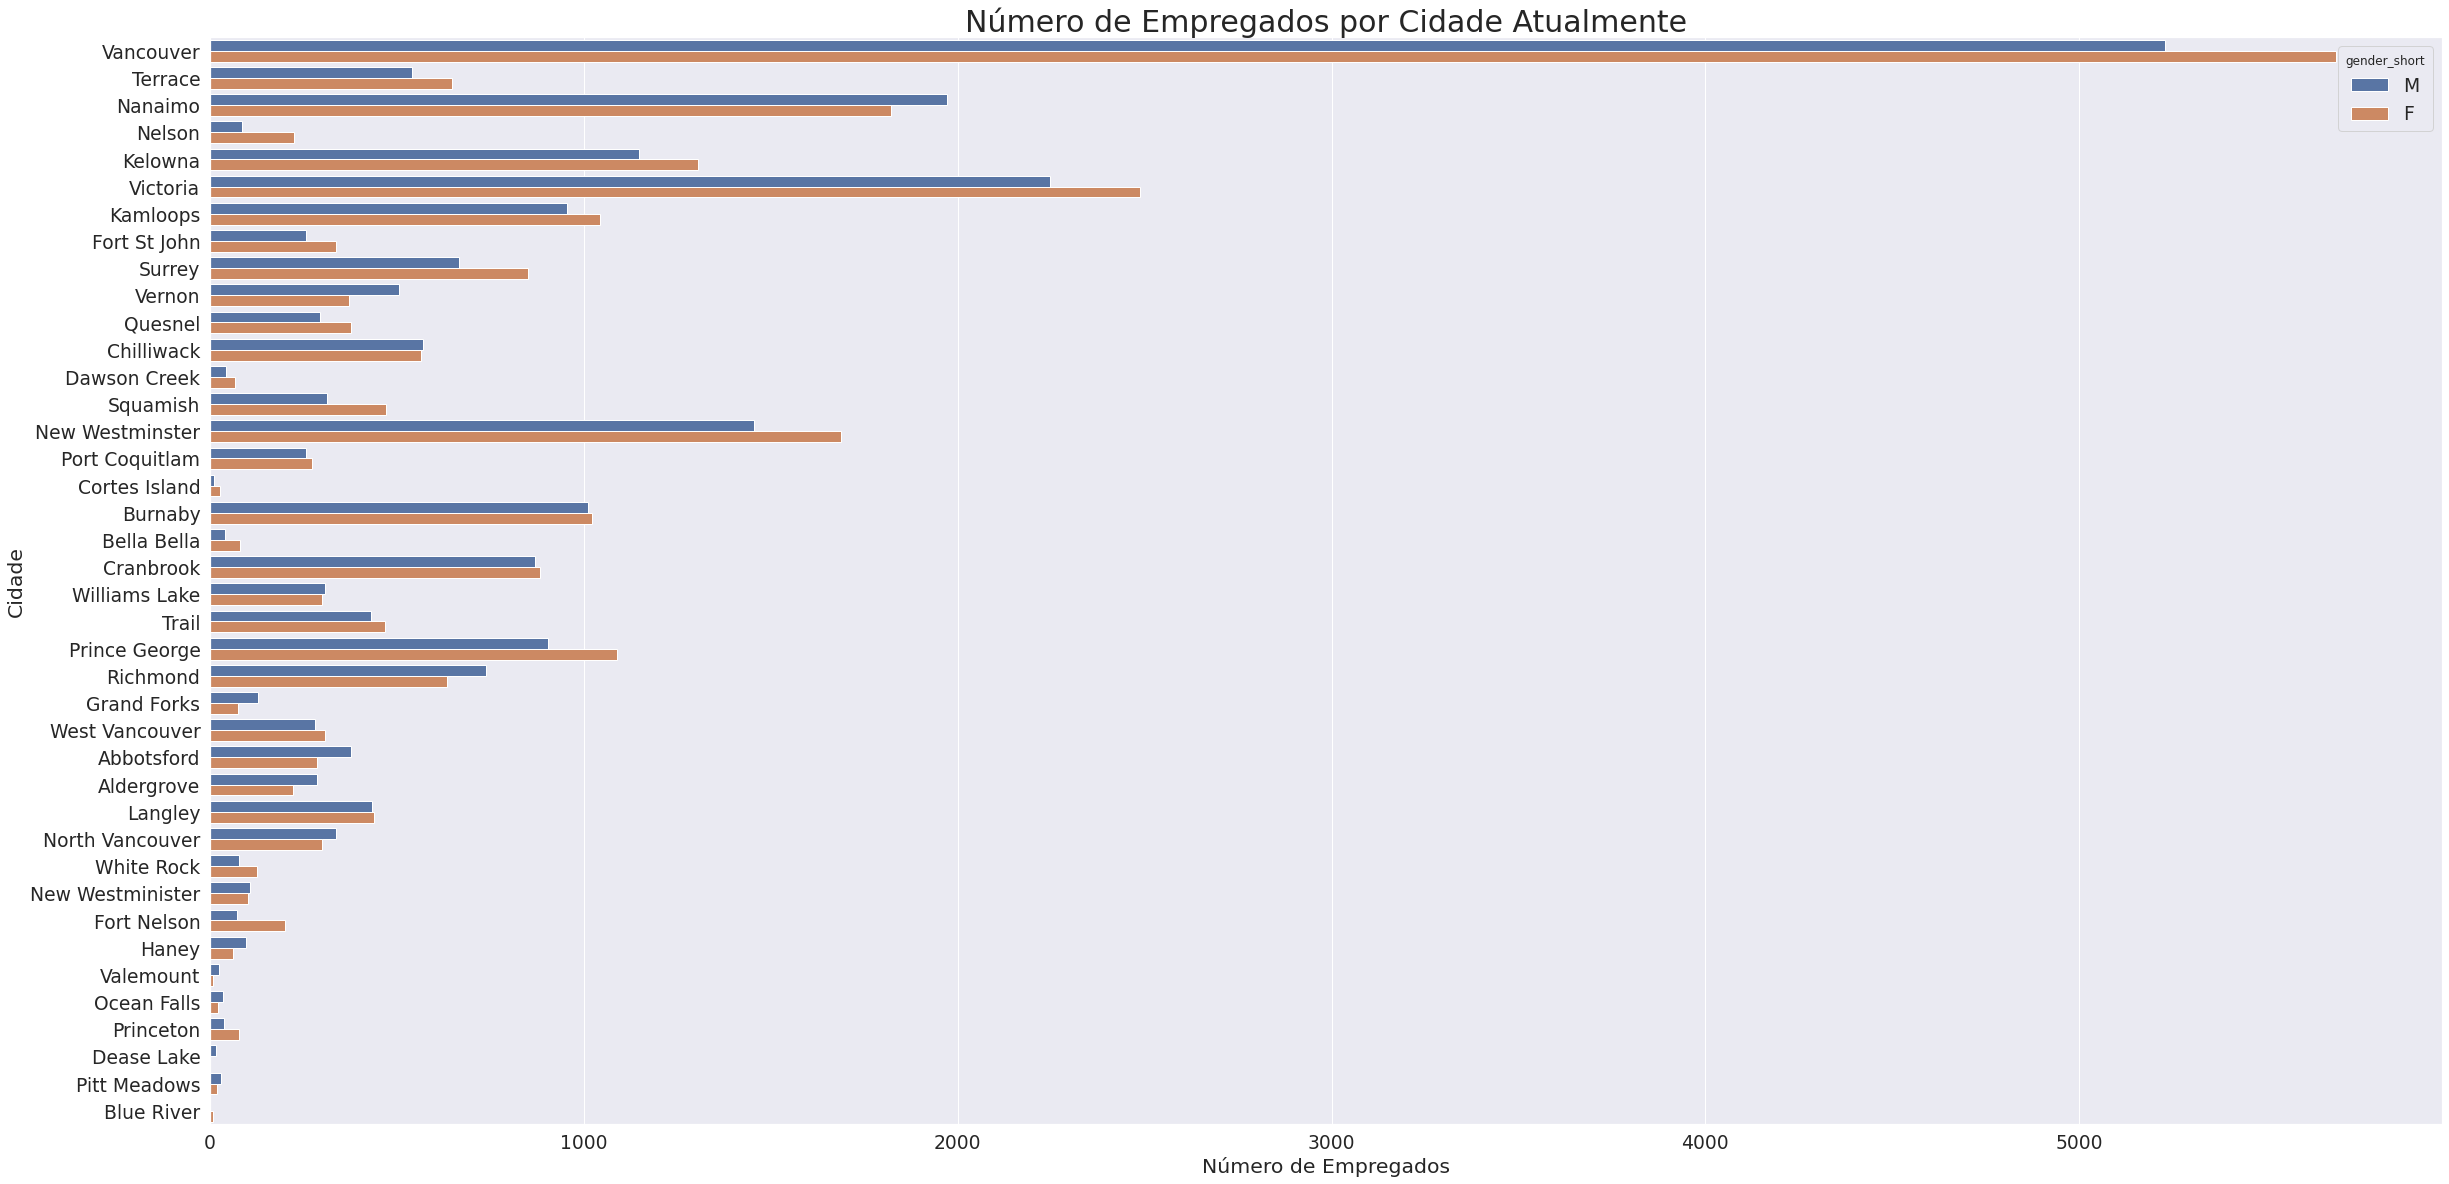

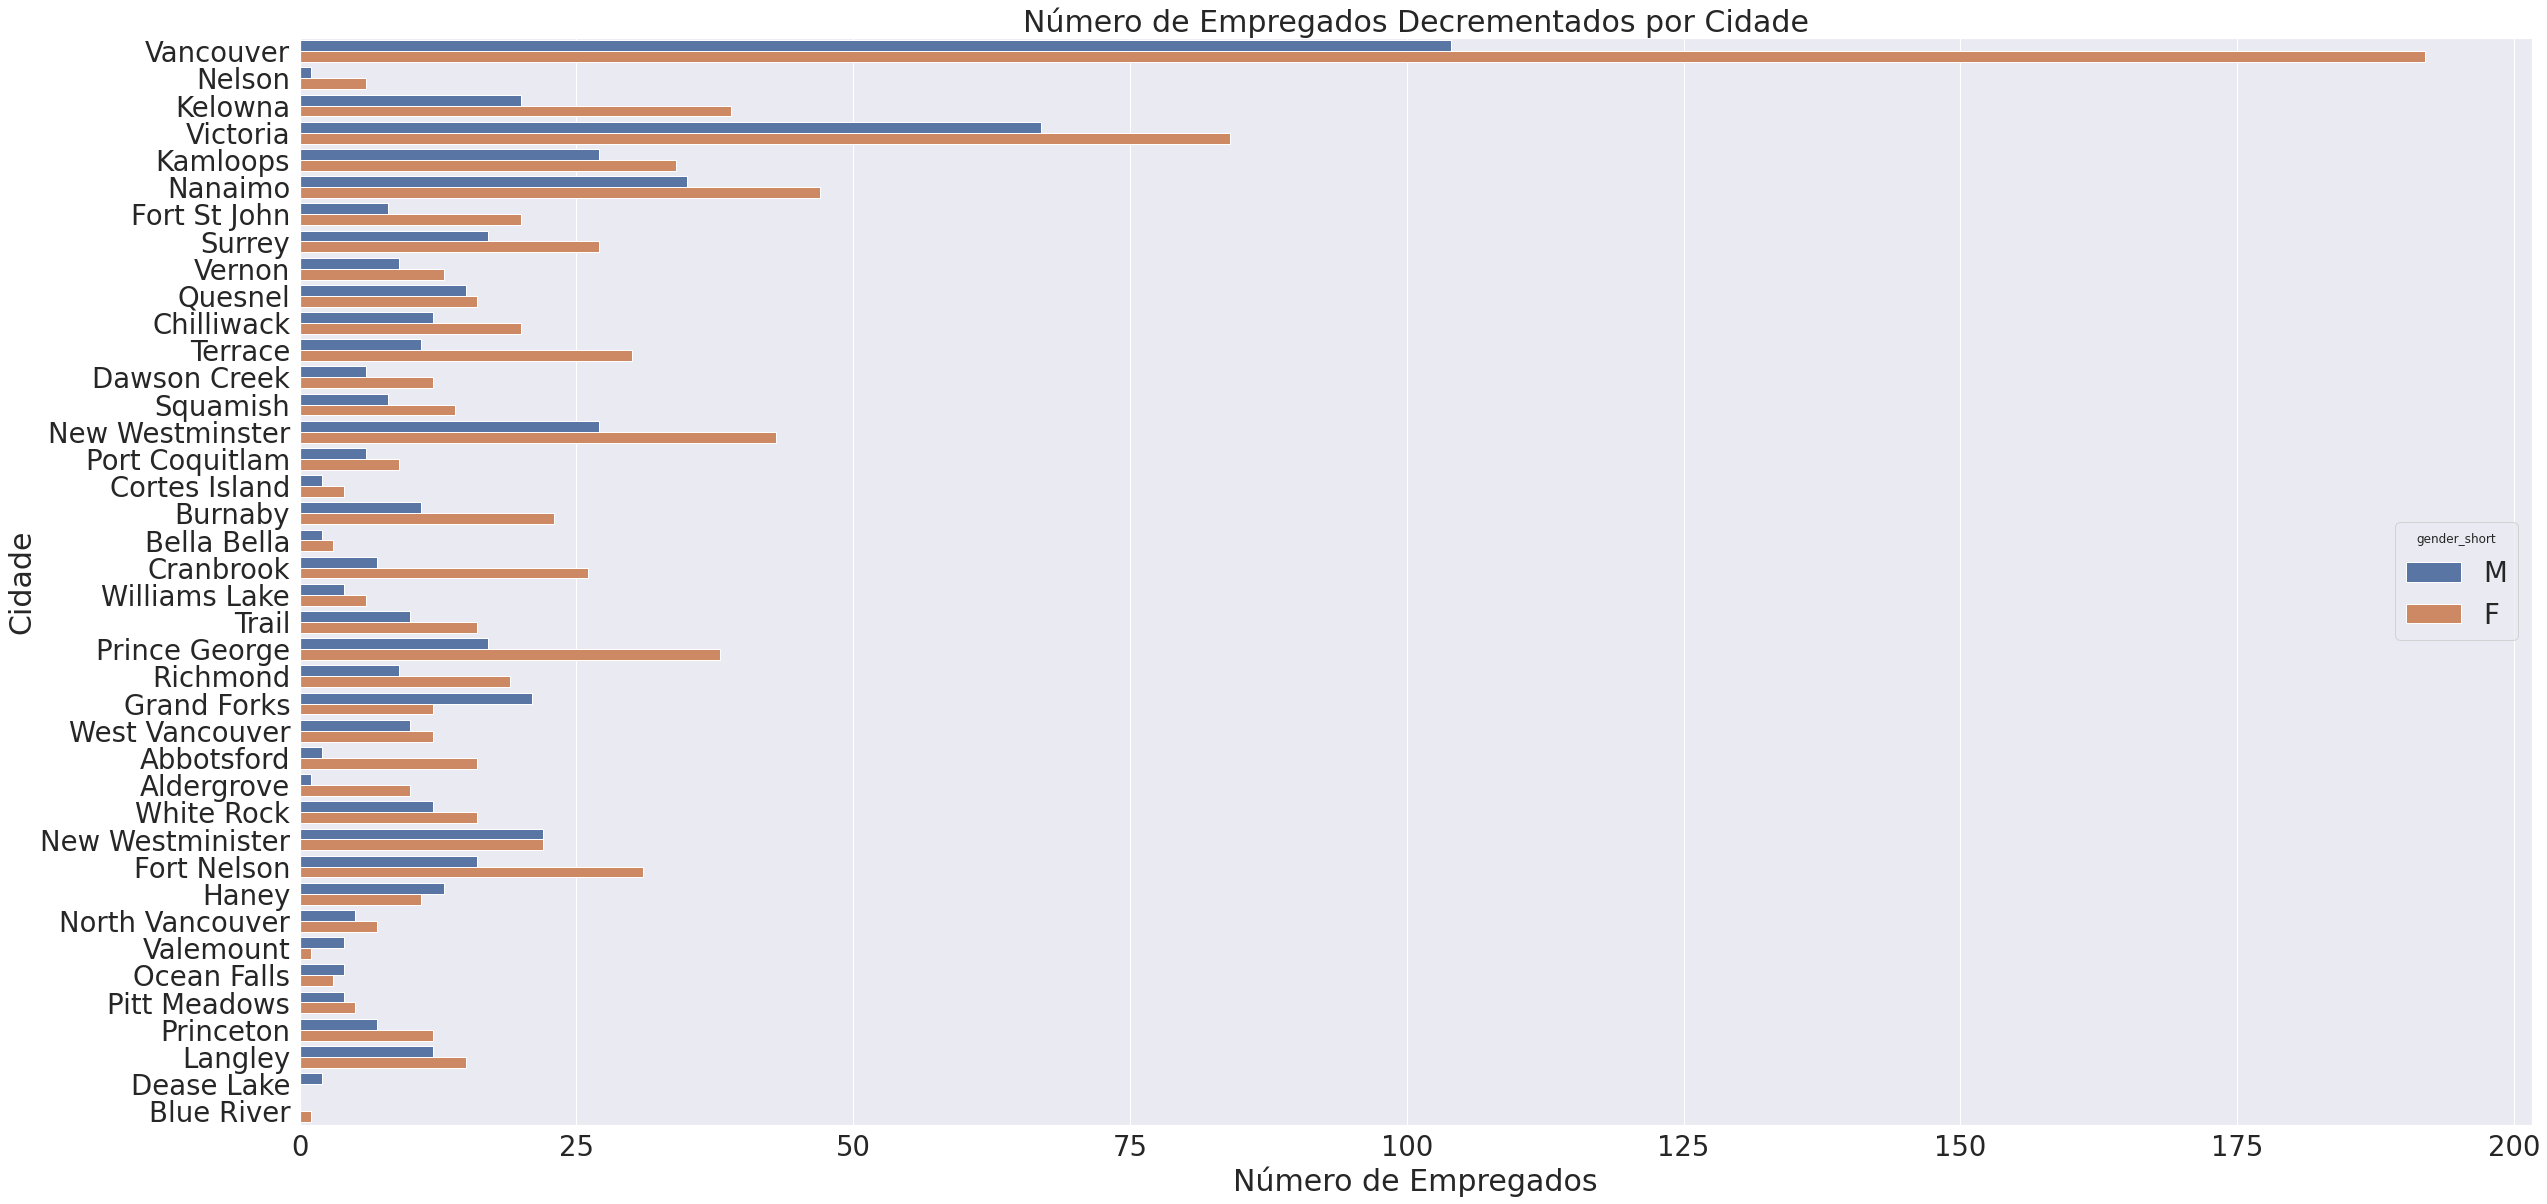

In [14]:
plt.figure(figsize=(40,20))
sns.countplot(y='city_name',data=df[df['STATUS']=='ACTIVE'],hue='gender_short')
sns.set(font_scale=2.5)
plt.title("Número de Empregados por Cidade Atualmente")
plt.ylabel('Cidade')
plt.xlabel('Número de Empregados')
plt.savefig('plot8A.png')

plt.figure(figsize=(40,20))
sns.countplot(y='city_name', data=df[df['STATUS']!='ACTIVE'], hue='gender_short')
sns.set(font_scale=2.5)

plt.title("Número de Empregados Decrementados por Cidade")
plt.ylabel('Cidade')
plt.xlabel('Número de Empregados')
plt.savefig('plot8B.png')

<ul><strong><font size="3.5">4.9. </font></strong>
<font size="3.5">Análise Comparativa Entre O Sexo e o <i>Status</i> dos Funcionários (Atuais ou Antigos Funciários) Registrados da Empresa, Isto Analisando o Número de Funcionários por Trabalho Realizado</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre os tipos de trabalho de acordo com a quantidade de funcionários, o sexo e se ainda atuam na empresa.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do gráfico exposto abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Com relação aos atuais funcionários da empresa:</font> </ul></ul>


<ul><ul><ul><font size="3">-Cargos com menos de 100 pessoas em cada sexo: NCEO; VP Stores; Legal Counsel;VP Human Resources; VP Finance; Exec Assistant, VP Stores; Exec Assistant, Legal Counsel; CHief Information Officer; Exec Assistant, Human Resources; Exec Assistant, Finance; Director, Recruitment; Director, Training; Director, Labor Relations; Director, HR Technology; Director, Employee Records; Director, Compensation; Corporate Lawyer;Trainer; Labor Relations Analyst; Dairy Manager; HRIS Analyst; Benefits Admin; Compensation Analyst; Accounts Receiveable Clerk; Accounts Payable Clerk; Auditor; Accounting Clerk; Investment Analyst; Systems Analyst; Director, Accounts Payable; Director, Audit; Director, Accounting; Director, Investments/ Director, Accounts Receivable.</font> </ul></ul></ul>
<ul><ul><ul><font size="3">-Cargos com menos de 1000 pessoas em cada sexo: Produce Manager, Bakery Manager, Recruiter, Processed Foods Manager, Customer Service Manager, Store Manager, Meats Manager.</font> </ul></ul></ul>
<ul><ul><ul><font size="3">-Cargos com mais de 1000 pessoas em cada sexo: Dairy Person, Baker, Meat Cutter, Produce Clerk, Shelf Stocker, Cashier.</font> </ul></ul></ul>

<ul><ul><font size="3">-O número de funcionários antigos em cada cargo  não possui relação com a quantidade de funcionários atuais em cada cargo.Diante de que, em sua maioria, os cargos que possuem mais antigos funcionários são os que possuem menos de 100 pessoas atualmente.</font> </ul></ul>


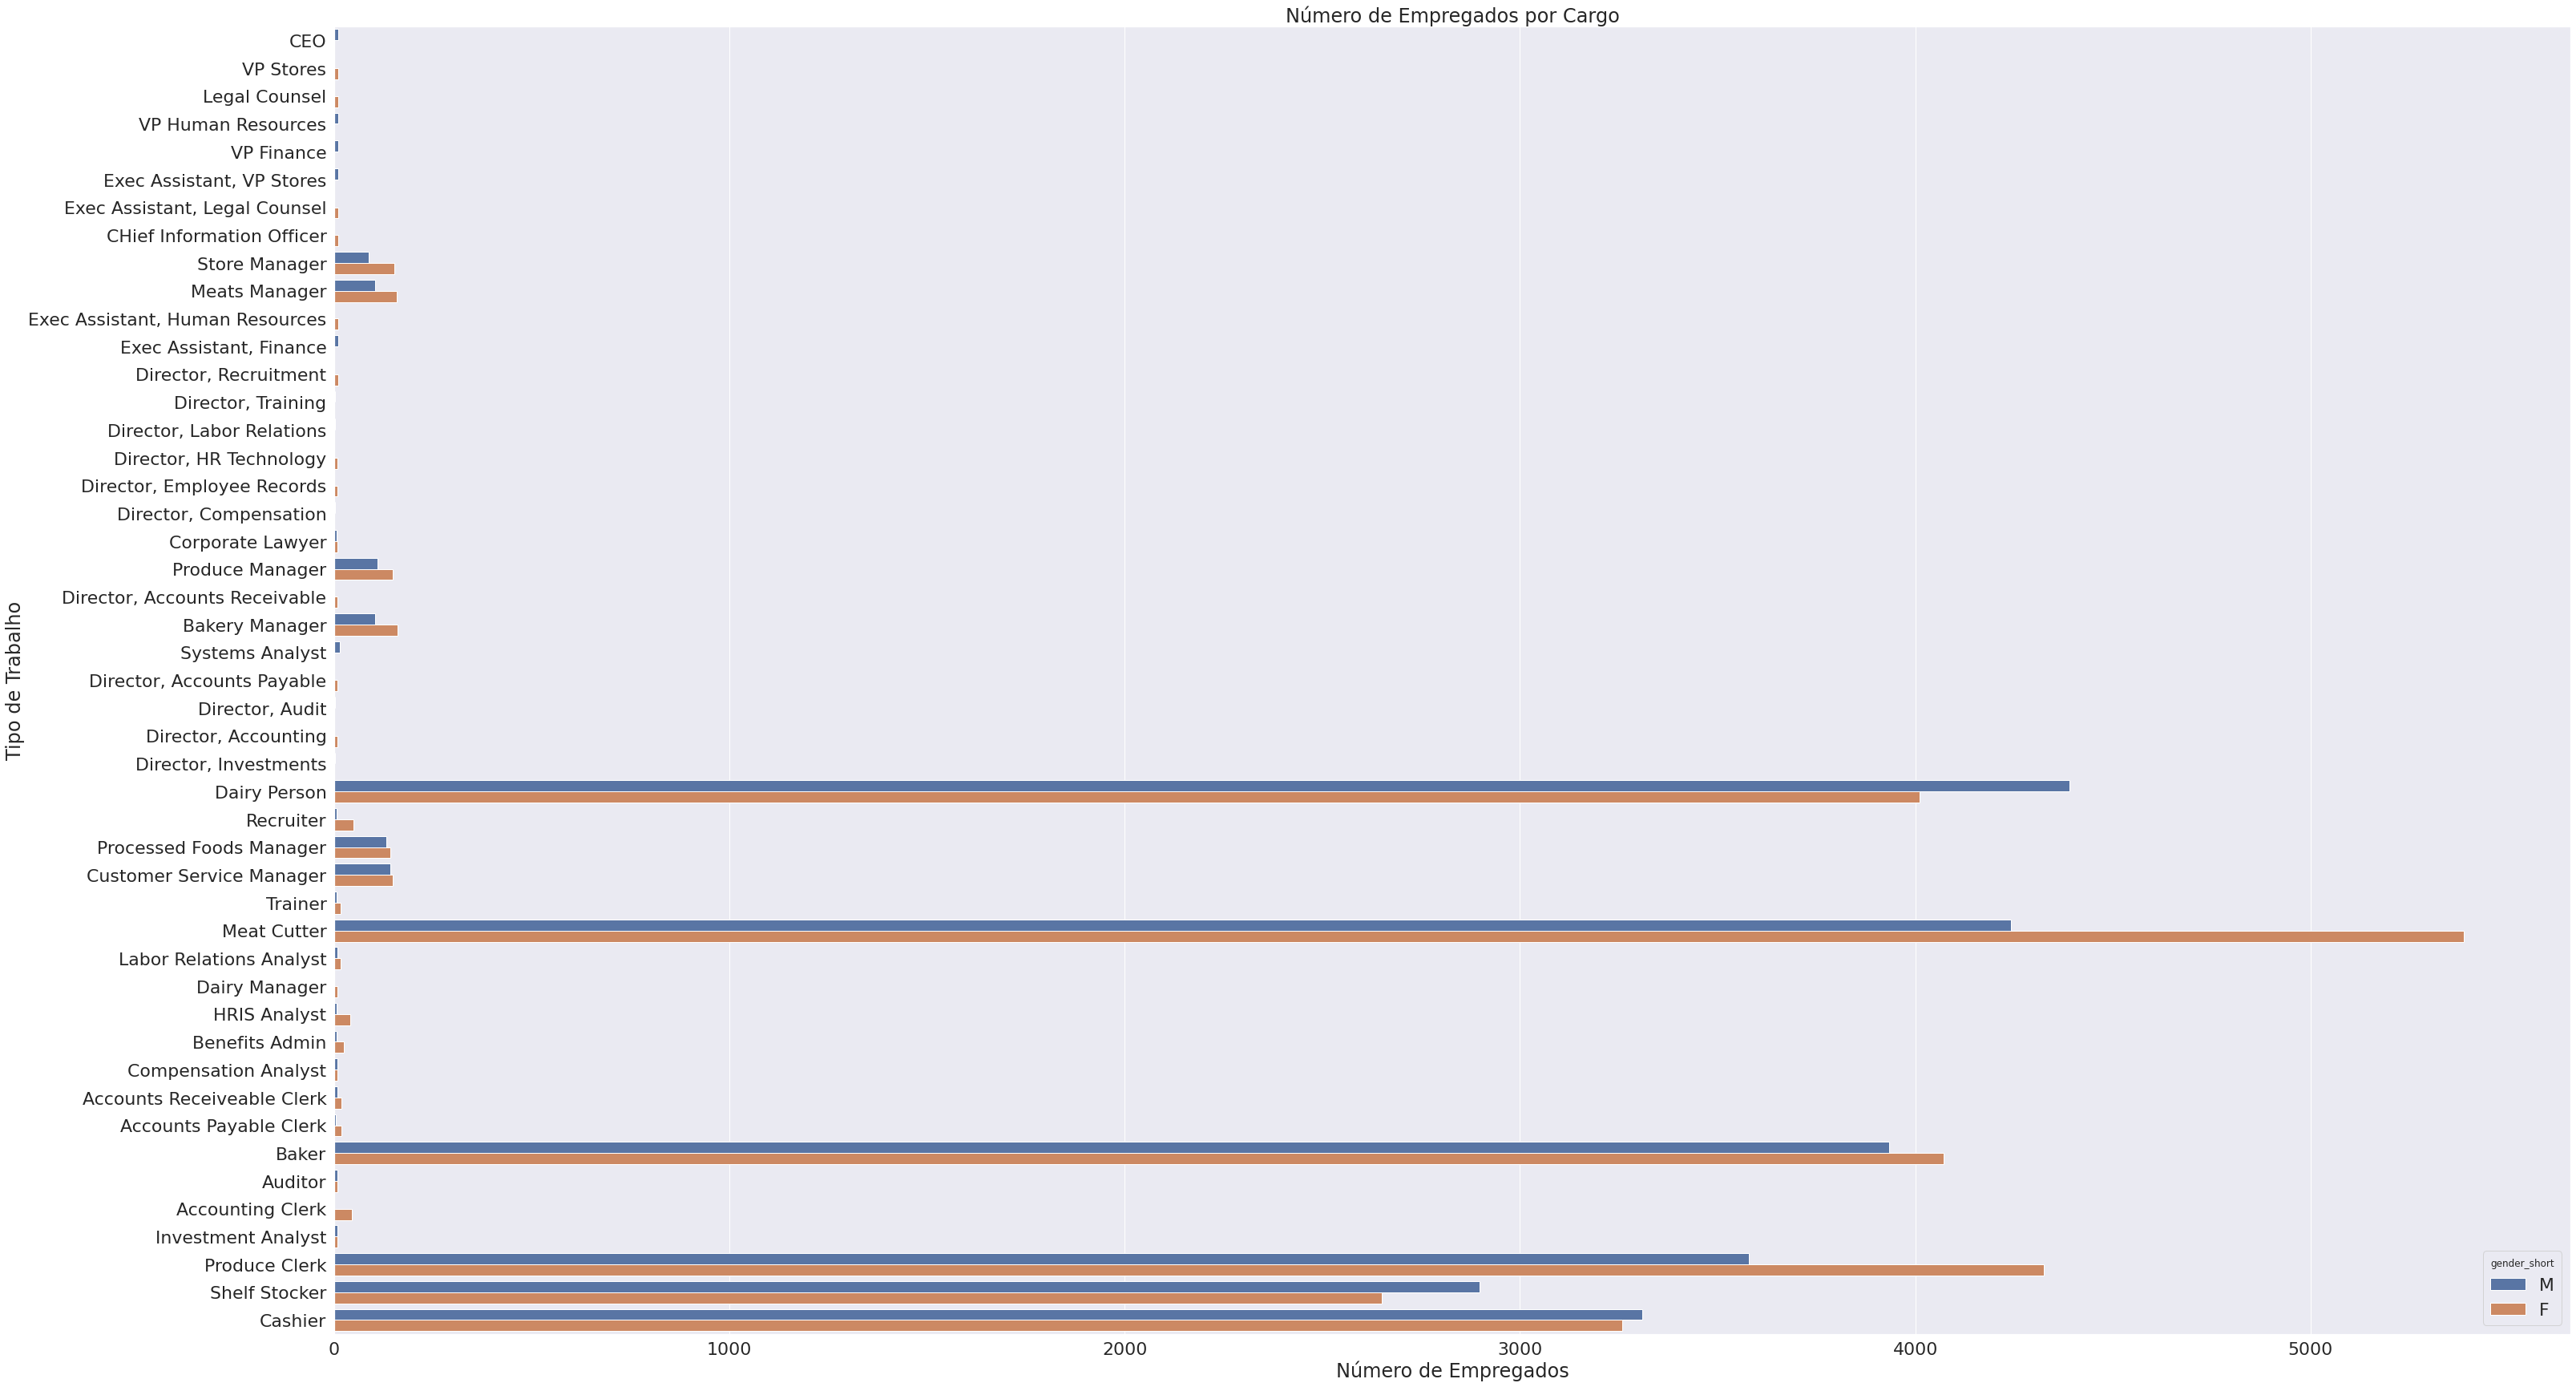

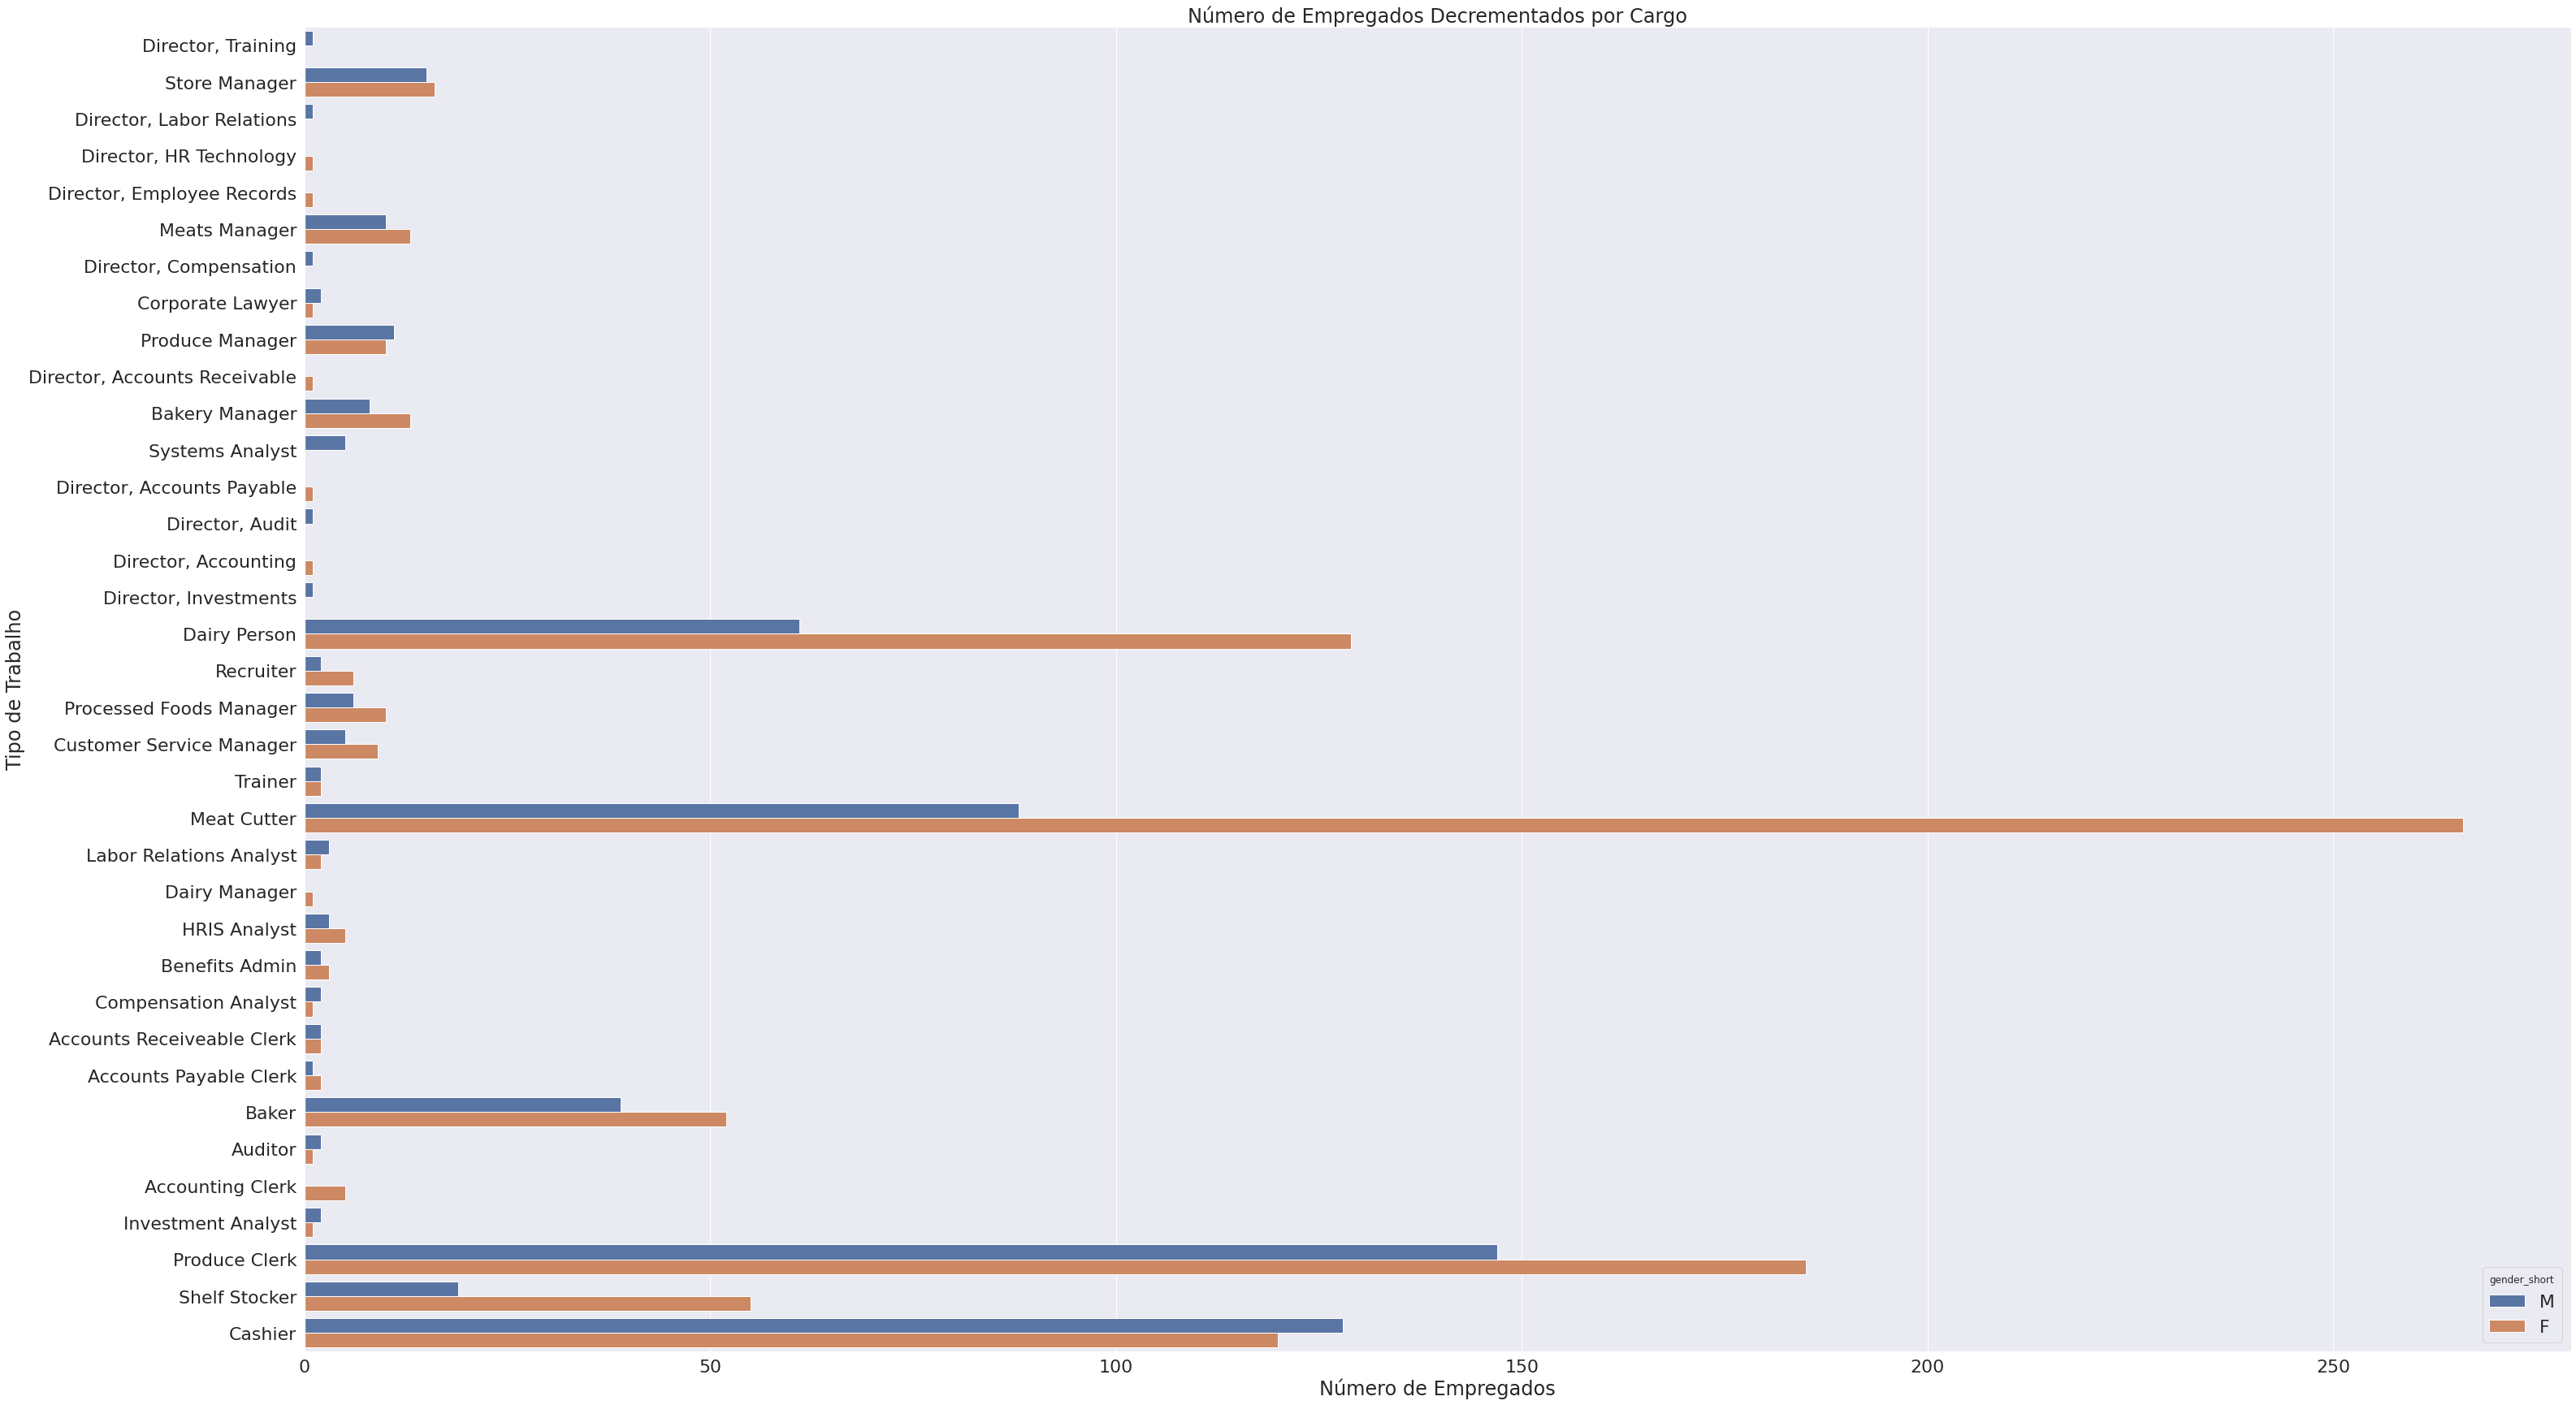

In [32]:
plt.figure(figsize=(50,30))

sns.countplot(y='job_title',data=df[df['STATUS']=='ACTIVE'],hue='gender_short')
sns.set(font_scale=2)
plt.title("Número de Empregados por Cargo")
plt.ylabel('Tipo de Trabalho')
plt.xlabel('Número de Empregados')
plt.savefig('plot9B.png')

plt.figure(figsize=(50,30))
sns.countplot(y='job_title', data=df[df['STATUS']!='ACTIVE'],hue='gender_short')
sns.set(font_scale=2)
plt.title('Número de Empregados Decrementados por Cargo')
plt.ylabel('Tipo de Trabalho')
plt.xlabel('Número de Empregados')
plt.savefig('plot9A.png')

<ul><strong><font size="3.5">4.10. </font></strong>
<font size="3.5">Análise Comparativa Entre o Sexo e Número dos Funcionários (Todos e Antigos Funcionários) Registrados na Empresa ao Longo dos Anos</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de funcionário contratados por ano e seus respectivos sexos.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Em sua maioria são contratadas mais funcionários do sexo feminino que masculino, com exceção dos anos: 2001, 2003, 2005, 2007, 2008, 2009. O que majoritariamente, não tem relação com os anos em que mais foram contratados antigos funcionários do sexo masculino, com exceção do ano de 2005. Com relação ao sexo feminino essa hipótese também se repete.</font> </ul></ul>
<br>

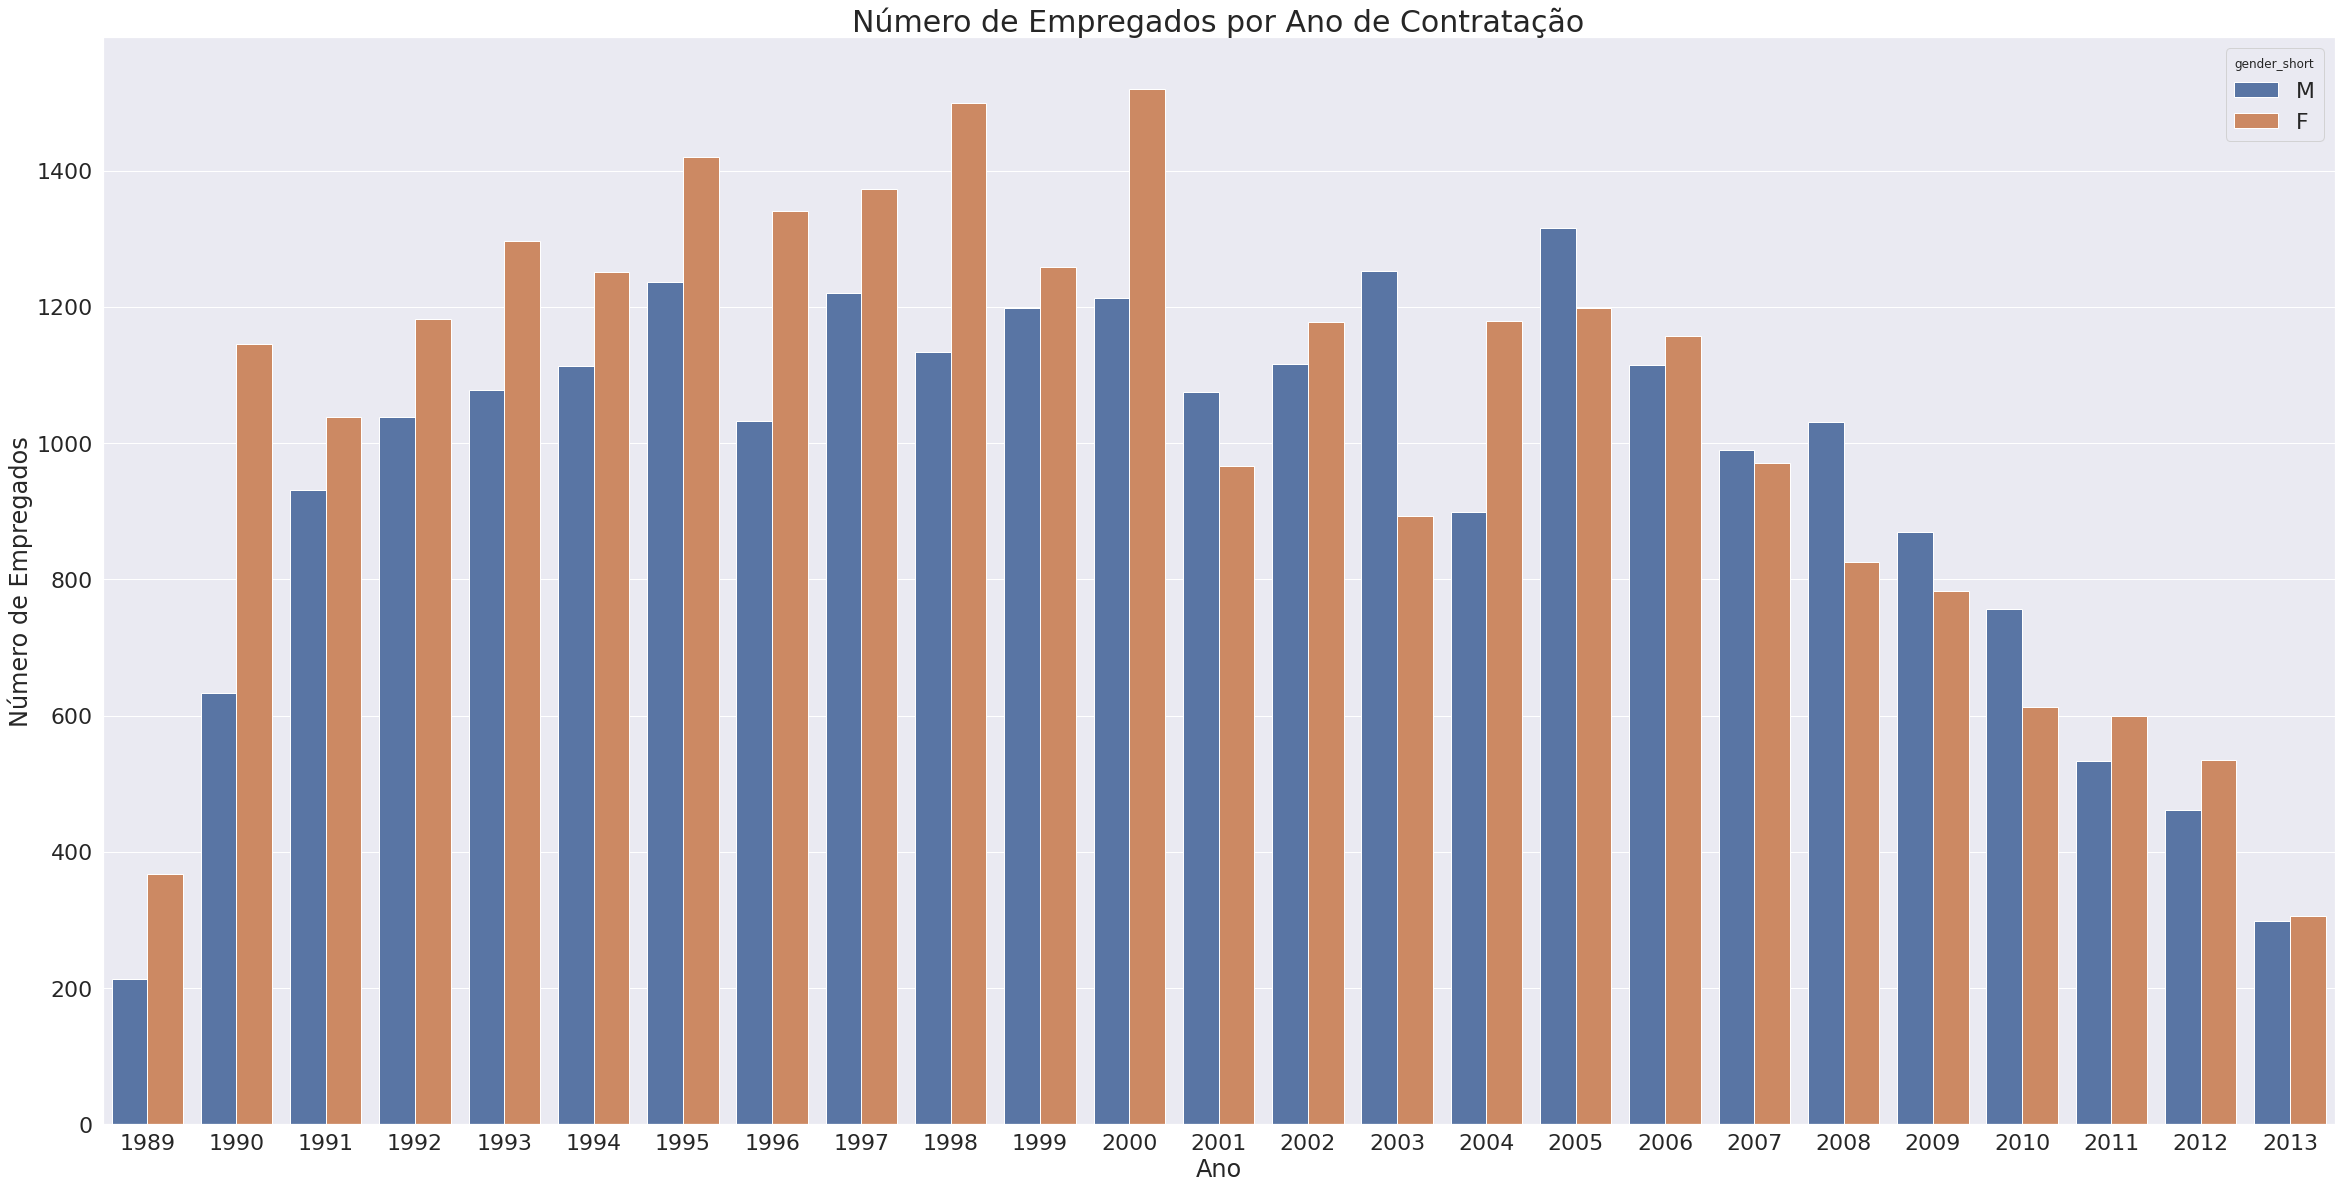

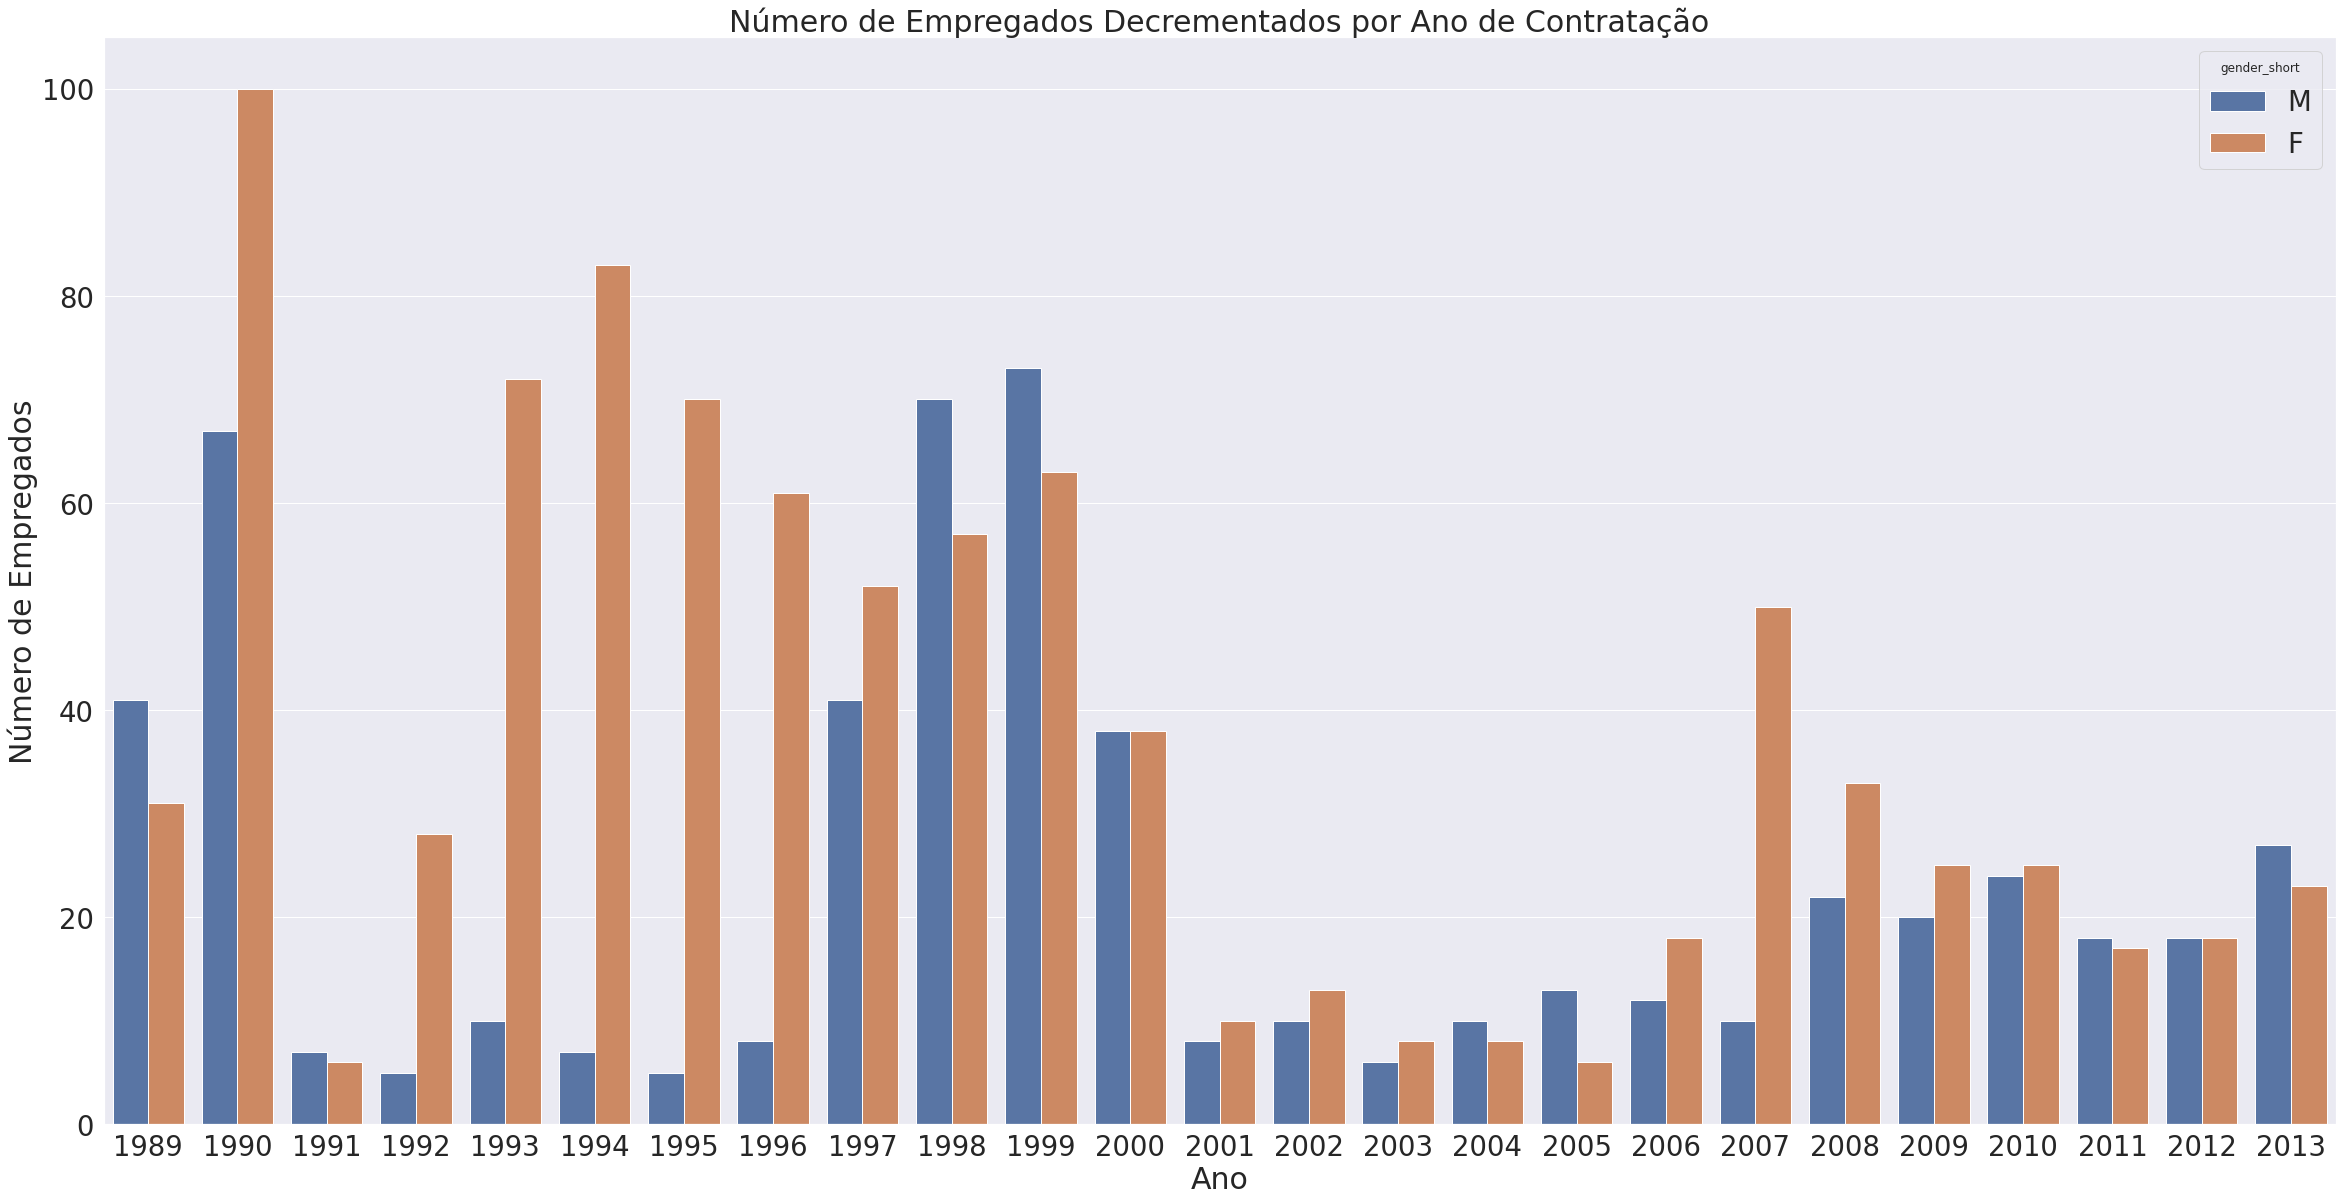

In [16]:
from nltk.probability import FreqDist
df['id']= range(0,len(df))
freq = FreqDist(df['year_of_contracting'])
ar = []

for x in range(len(df['id'])):
    ar.append([x, df.loc[x,'year_of_contracting'],df.loc[x,'STATUS'],df.loc[x,'gender_short'] ])
    
plt.figure(figsize=(40,20))
sns.countplot(x='year_of_contracting',data=df,hue='gender_short')
sns.set(font_scale=2.5)

plt.title("Número de Empregados por Ano de Contratação")
plt.xlabel('Ano')
plt.ylabel('Número de Empregados')
plt.savefig('plot10A.png')

plt.figure(figsize=(40,20))
sns.countplot(x='year_of_contracting', data=df[df['STATUS']!='ACTIVE'],hue='gender_short')
sns.set(font_scale=2.5)

plt.title("Número de Empregados Decrementados por Ano de Contratação")
plt.xlabel('Ano')
plt.ylabel('Número de Empregados')
plt.savefig('plot10B.png')


<ul><strong><font size="3.5">4.11. </font></strong>
<font size="3.5">Análise Comparativa Entre o Sexo e Número dos Funcionários (Atuais e Antigos Funcionários) Registrados na Empresa por <i>Business Unit</i></font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de funcionário contratados por <i>Business Unit</i> e seus respectivos sexos.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Tanto com relação aos antigos funcionários, quanto aos atuais, nota-se que há a concentração de funcionários na unidade <i>Store</i> (loja), obviamente existindo uma escassa quantidade de funcionários no setor <i>Head Office</i> (escritório).</font> </ul></ul>
<ul><font size="3"><strong>Suposições</strong>: Diante do gráfico exposto abaixo é possível estimar que :</font></ul>
<ul><ul><font size="3">-Em ambos as unidades, nas duas situações, a maioria dos funcionários são do sexo feminino.</font> </ul></ul>
<br>

/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


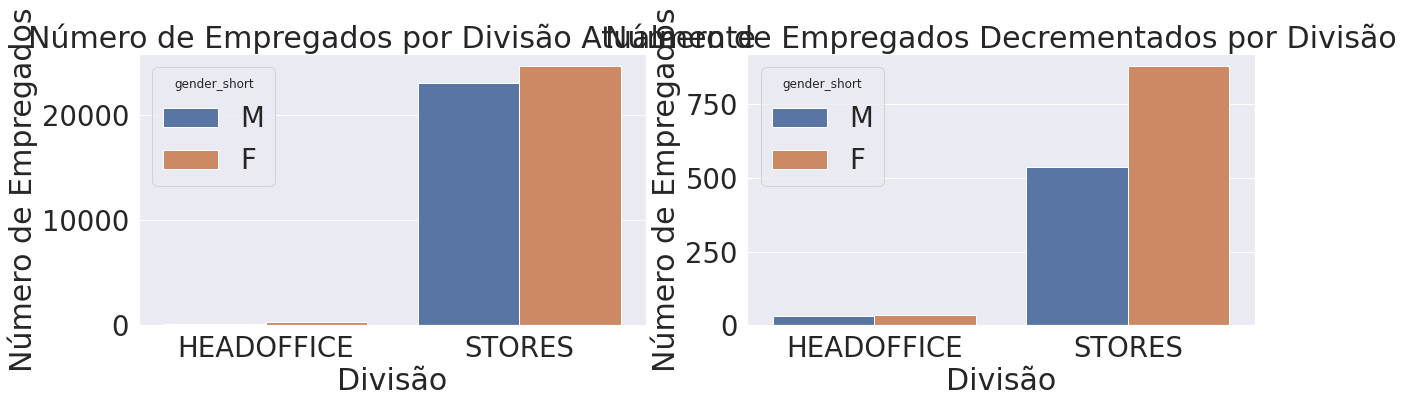

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20,5))


ax[0] = sns.countplot(x='BUSINESS_UNIT',data=df[df['STATUS']=='ACTIVE'],ax=ax[0],hue='gender_short')
#sns.set(font_scale=1)

ax[0].set_title("Número de Empregados por Divisão Atualmente")
ax[0].set(xlabel='Divisão', ylabel = 'Número de Empregados')

ax[1]=sns.countplot(x='BUSINESS_UNIT', data=df[df['STATUS']!='ACTIVE'],ax=ax[1],hue='gender_short')
#sns.set(font_scale=1)

ax[1].set_title("Número de Empregados Decrementados por Divisão")
ax[1].set(xlabel='Divisão', ylabel = 'Número de Empregados')
fig.savefig('plot11.png')
fig.show()

<ul><strong><font size="3.5">4.12. </font></strong>
<font size="3.5">Análise Comparativa Entre o Sexo e a Idade dos Atuais e Antigos Funcionários Registrados na Empresa por <i>Business Unit</i></font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre o sexo e a idade dos funcionários contratados por <i>Business Unit</i></font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Tanto com relação aos antigos funcionários, quanto aos atuais, nota-se que há a concentração de funcionários na unidade <i>Store</i>, obviamente existindo uma escassa quantidade de funcionários no setor <i>Head Office</i> (escritório).</font> </ul></ul>
<ul><ul><font size="3">-Na unidade <i>Head Office</i> (escritório) atualmente há majoritariamente funcionários do sexo feminino.</font> </ul></ul>
<ul><ul><font size="3">-Na unidade <i>Head Office</i> (escritório) atualmente seus funcionários estão na faixa acima dos 40 anos.</font> </ul></ul>
<ul><ul><font size="3">-Na unidade <i>Head Office</i> (escritório) há majoritariamente antigos funcionários do sexo masculino.</font> </ul></ul>
<ul><ul><font size="3">-Na unidade <i>Store</i> (loja) há funcionários, atuais e antigos, de idades e gênero variadas. </font> </ul></ul>
<br>

/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


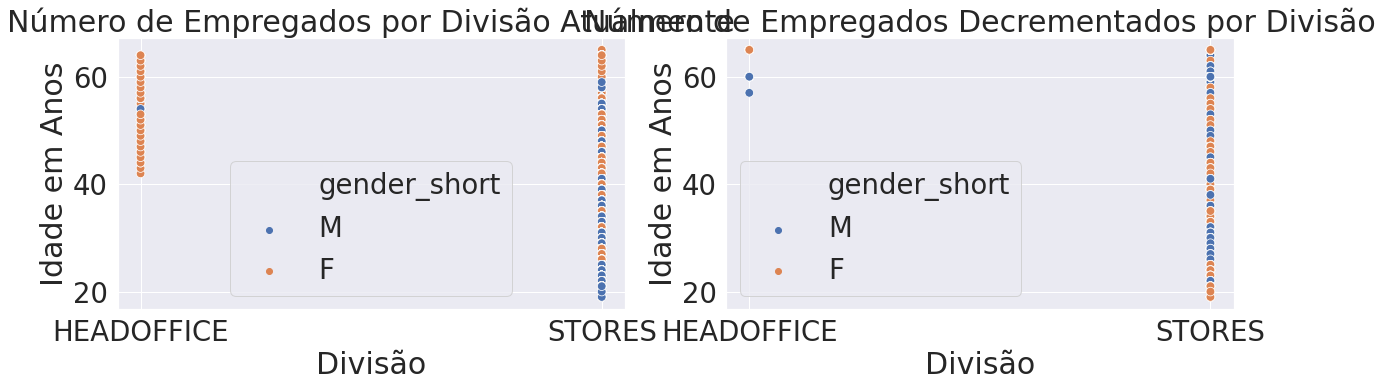

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,5))


ax[0] = sns.scatterplot(x='BUSINESS_UNIT',y='age',data=df[df['STATUS']=='ACTIVE'],ax=ax[0],hue='gender_short',s=75)
#sns.set(font_scale=1.8)

ax[0].set_title("Número de Empregados por Divisão Atualmente")
ax[0].set(xlabel='Divisão', ylabel = 'Idade em Anos')

ax[1]=sns.scatterplot(x='BUSINESS_UNIT',y='age', data=df[df['STATUS']!='ACTIVE'],ax=ax[1],hue='gender_short',s=75)
#sns.set(font_scale=1.8)

ax[1].set_title("Número de Empregados Decrementados por Divisão")
ax[1].set(xlabel='Divisão', ylabel = 'Idade em Anos')
fig.savefig('plot12.png')
fig.show()

<ul><strong><font size="3.5">4.13. </font></strong>
<font size="3.5">Análise Comparativa Entre o Antigo Número dos Funcionários, a Justificativa e o Tipo do Encerramento do Tempo de Trabalho</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de antigos funcionário contratados, a justificativa e o tipo (Voluntário ou Involuntário) reclusão.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Só houveram <i>Layoff</i> (demissões) involutárias, nos anos de 2014 e 2015.</font> </ul></ul>

<ul><ul><font size="3">-A maior causa de demissão em 2013 e entre 2006 e 2010 foi <i>Retirement</i> (aponsetadoria).</font> </ul></ul>
<ul><ul><font size="3">-A maior causa de demissão em 2012 e 2013 foi <i>Resignation</i> (demitiram-se).</font> </ul></ul>
<ul><ul><font size="3">-Só houveram <i>Layoff</i> (demissões) involutárias, nos anos de 2014 e 2015.</font> </ul></ul>

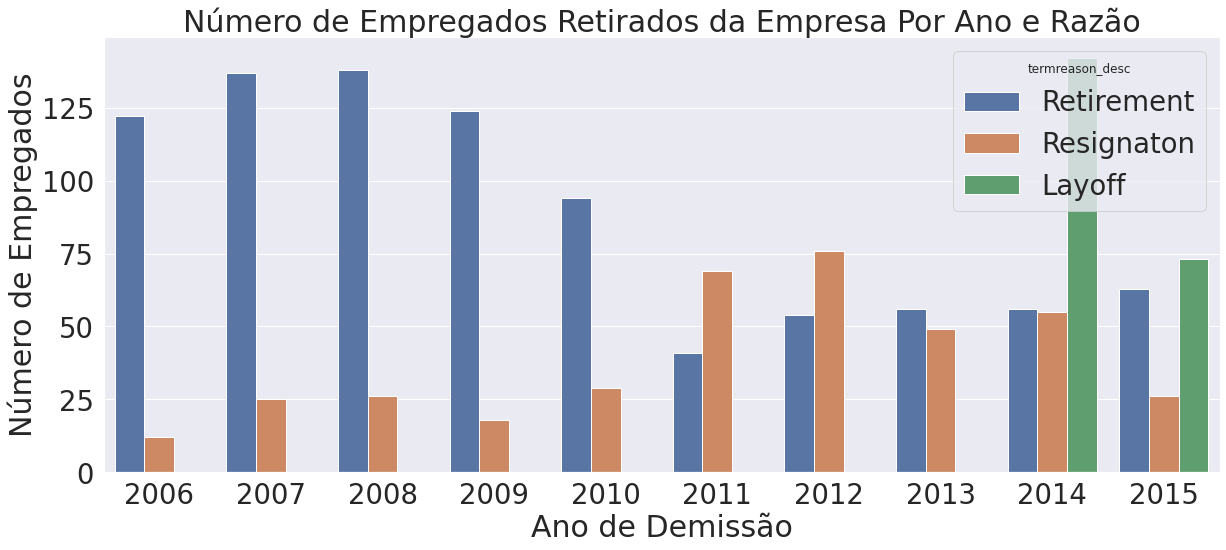

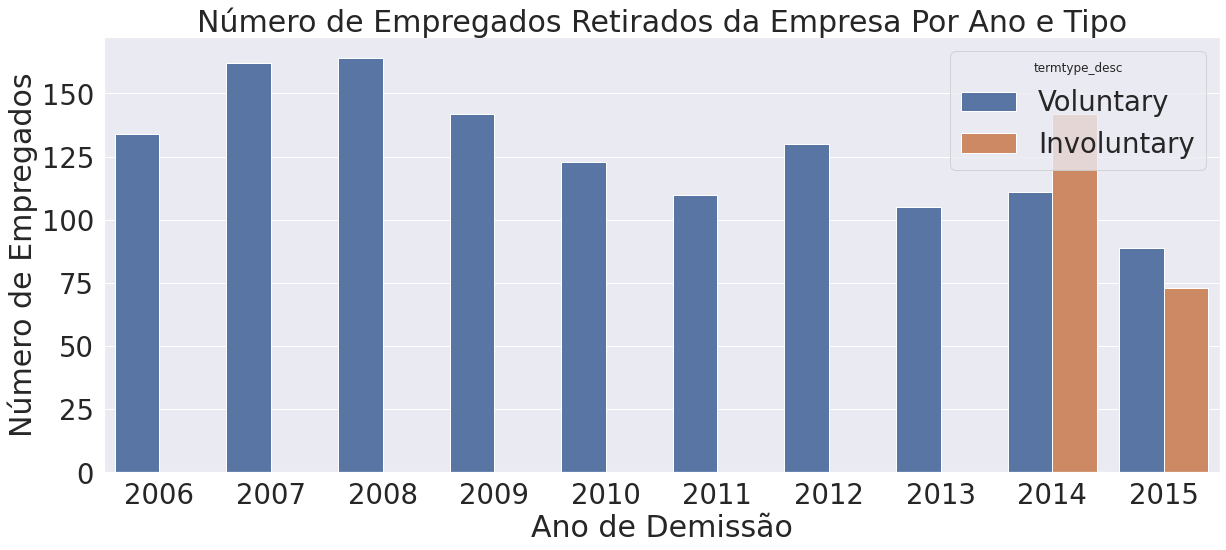

In [19]:
for x in df[df['STATUS']!= 'ACTIVE']['id']:
    df.loc[int(x),'year_of_demission'] = df.loc[int(x),'terminationdate_key'].split('/')[2]
plt.figure(figsize=(20,8))
sns.countplot(x='year_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='termreason_desc') 
plt.xlabel('Ano de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Ano e Razão')
plt.savefig('plot13A.png')
plt.figure(figsize=(20,8))
sns.countplot(x='year_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='termtype_desc')
plt.xlabel('Ano de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Ano e Tipo')
plt.savefig('plot13B.png')

<ul><strong><font size="3.5">4.14. </font></strong>
<font size="3.5">Análise Comparativa Entre o Antigo Número de Funcionários e Seus Respectivos Gêneros</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de antigos funcionários contratados e seus respectivos gêneros</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Com exceção de 2006, todos os outros anos, mais funcionários do sexo feminino saem da empresa.</font> </ul></ul>


/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


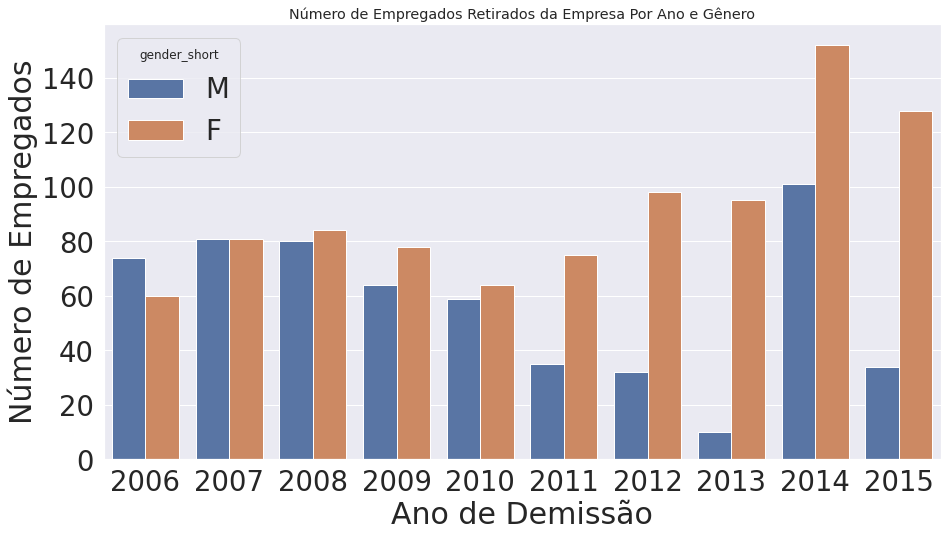

In [20]:
for x in df['id']:
    if df.loc[x,'STATUS']!= 'ACTIVE':
        df.loc[int(x),'year_of_demission'] = df.loc[int(x),'terminationdate_key'].split('/')[2]
    else:
        df.loc[int(x),'year_of_demission'] = '0'
plt.figure(figsize=(15,8))
sns.countplot(x='year_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='gender_short')
sns.set(font_scale=1.2)  
plt.xlabel('Ano de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Ano e Gênero')
plt.savefig('plot14.png')
fig.show()

<ul><strong><font size="3.5">4.15. </font></strong>
<font size="3.5">Análise Comparativa Entre o Antigo Número de Funcionários e Seus Respectivos Gêneros Por Mês</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de antigos funcionários contratados e seus respectivos gêneros por mês.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Em todos os meses mais funcionários do sexo feminino saem da empresa.</font> </ul></ul>
<ul><ul><font size="3">-Há uma concentração no mês 12 em número de funcionários que saem da empresa.</font> </ul></ul>


/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


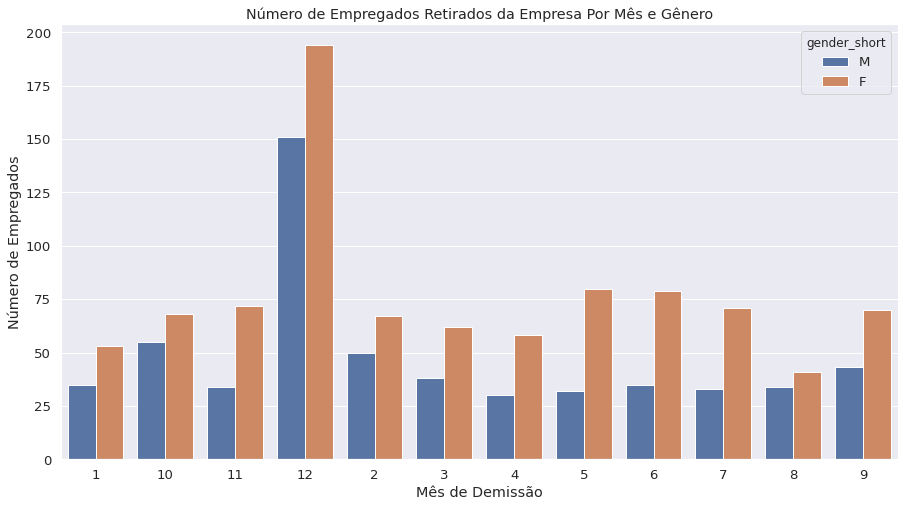

In [21]:
for x in df[df['STATUS']!= 'ACTIVE']['id']:
    df.loc[int(x),'month_of_demission'] = df.loc[int(x),'terminationdate_key'].split('/')[0]
for x in df[df['STATUS']== 'ACTIVE']['id']:
    df.loc[int(x),'month_of_demission'] = 0
plt.figure(figsize=(15,8))
sns.countplot(x='month_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='gender_short')
sns.set(font_scale=1.2)  
plt.xlabel('Mês de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Mês e Gênero')
plt.savefig('plot15.png')

fig.show()

<ul><strong><font size="3.5">4.16 </font></strong>
<font size="3.5">Análise Comparativa Entre o Antigo Número de Funcionários e Seus Respectivos Tipo e Razão da Reclusão, Isto Por Mês</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de antigos funcionários contratados e seus respectivos tipos e razões da reclusão, por mês.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-O mês 12 se mostra o mês em que a empresa despede (<i>layoff</i>) seus funcionários de forma involuntária (<i>involuntary</i>).</font> </ul></ul>
<ul><ul><font size="3">-Os meses 6, 9 e 10 são o meses em que as pessoas mais se demitem (<i>resignation</i>) de forma voluntária (<i>voluntary</i>).</font> </ul></ul>
<ul><ul><font size="3">-Todos os meses, com exceção do mês 12, a maior causa de reclusão se dá pela aposentadoria (<i>retirement</i>) de forma voluntária (<i>voluntary</i>).</font> </ul></ul>



/home/yasmin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


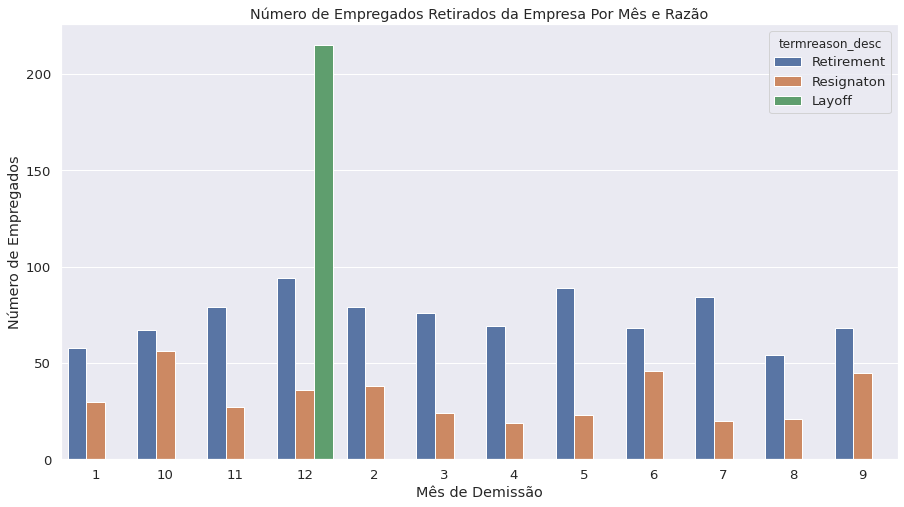

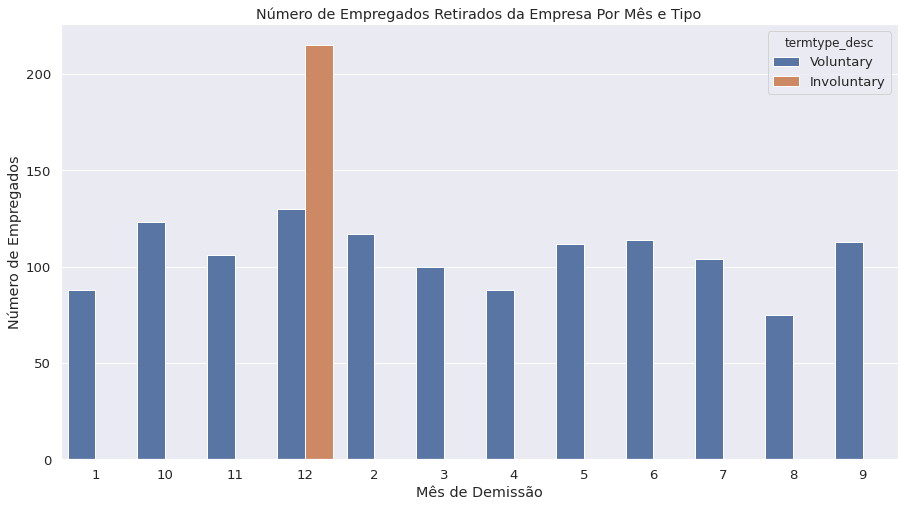

In [22]:

plt.figure(figsize=(15,8))
sns.countplot(x='month_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='termreason_desc')
sns.set(font_scale=1.2)  
plt.xlabel('Mês de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Mês e Razão')
plt.savefig('plot16A.png')
plt.figure(figsize=(15,8))
sns.countplot(x='month_of_demission', data=df[df['STATUS']!= 'ACTIVE'], hue='termtype_desc')
sns.set(font_scale=1.2)  
plt.xlabel('Mês de Demissão')
plt.ylabel('Número de Empregados')
plt.title('Número de Empregados Retirados da Empresa Por Mês e Tipo')
plt.savefig('plot16B.png')
fig.show()

<ul><strong><font size="3.5">4.17. </font></strong>
<font size="3.5">Análise Comparativa Entre o Antigo Número de Funcionários e Seus Respectivos Gêneros Por Mês</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a quantidade de antigos funcionários contratados e seus respectivos gêneros por mês.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Ao longo de todos os anos há uma maior presença de funcionários do sexo feminino e maior concentração de pessoas trabalhando na unidade <i>Store</i> que na <i>Head Office</i>.</font> </ul></ul>
<ul><ul><font size="3">-Com relação ao número de funcionários ao longo dos anos, estes cresceram exponencialmente até 2006 quando começaram a decair exponencialmente, existindo em 2014 o número de funcionário que havia em média entre os anos de 1989 e 1990.</font> </ul></ul>


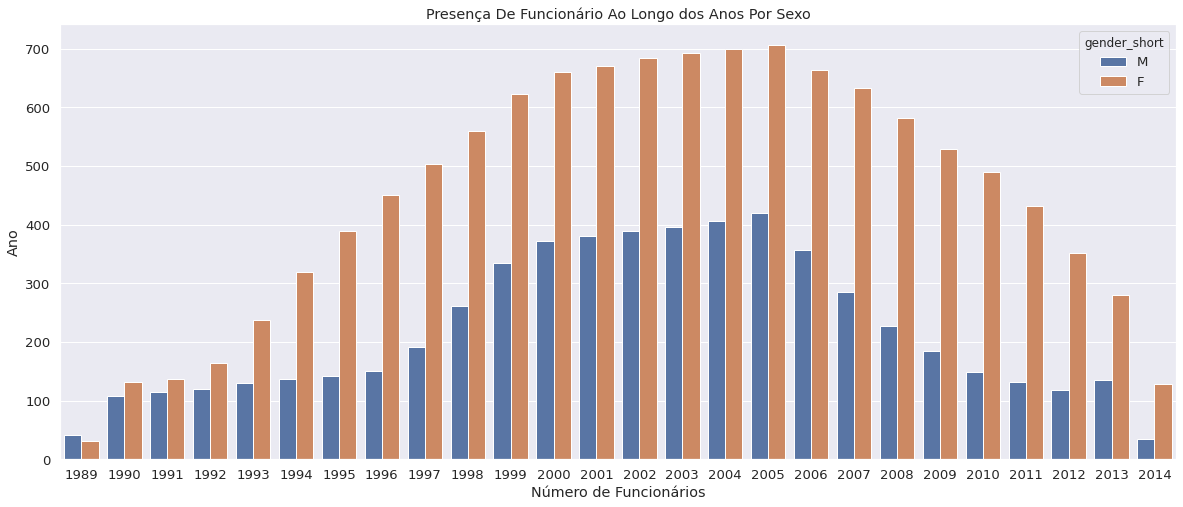

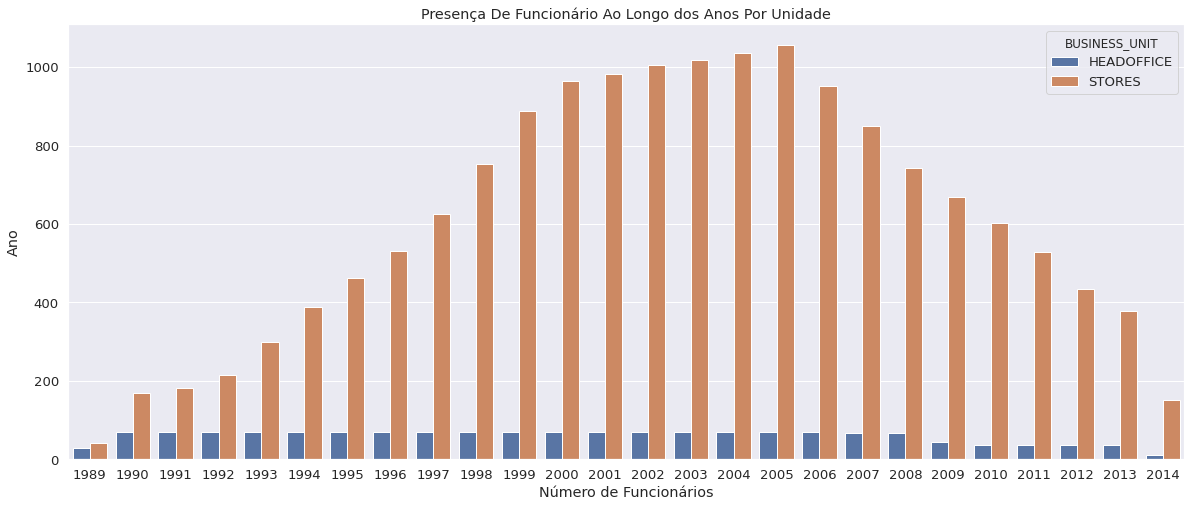

In [23]:
dl = pd.DataFrame({'year_of_demission': df['year_of_demission'] , 'year_of_contratation': df['year_of_contratation'],
                   'gender_short': df['gender_short'],'city_name': df['city_name'], 
                   'department_name': df['department_name'], 'BUSINESS_UNIT':df['BUSINESS_UNIT'],
                    'job_title': df['job_title']})

for x in range(len(dl['year_of_contratation'])): #Quantidade de linhas a serem analisadas
    if dl.loc[x,'year_of_demission'] == '0':
        dl.loc[x,'year_of_demission'] = dl['year_of_demission'].max()
    for y in range(int(df.loc[x,'year_of_contratation']),int(df.loc[x,'year_of_demission'])):
        dl.loc[x,y]= True
for y in [1989,1990,1991,                   1992,                   1993,
                     1994,                   1995,                   1996,
                     1997,                   1998,                   1999,
                     2000,                   2001,                   2002,
                     2003,                   2004,                   2005,
                     2006,                   2007,                   2008,
                     2009,                   2010,                   2011,
                     2012,                   2013,                   2014]:
    if (pd.notna(dl.loc[x,y]) == False):
        dl.loc[x,y] = False
        
dl = dl.melt(id_vars=['year_of_demission', 'year_of_contratation',         'gender_short',
                  'city_name',      'department_name',        'BUSINESS_UNIT',
                  'job_title'], 
        var_name="year", 
        value_name="Value")
for x in ['gender_short', 'BUSINESS_UNIT']:
    plt.figure(figsize=(20,8))
    sns.countplot(x='year', data=dl[dl['Value']== True], hue=x)
    plt.xlabel('Número de Funcionários')
    plt.ylabel('Ano')
    if(x=='gender_short'):
        plt.title('Presença De Funcionário Ao Longo dos Anos Por Sexo')
        plt.savefig('plot17A.png')
    if(x=='BUSINESS_UNIT'):
        plt.title('Presença De Funcionário Ao Longo dos Anos Por Unidade')
        plt.savefig('plot17B.png')

<ul><strong><font size="3.5">4.18. </font></strong>
<font size="3.5">Análise Comparativa Por Ano, Identificando a Presença De Funcionários Em Cada Cidade, Deparmento e Cargo.</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma comparação entre a presença anual em cada cidade, departamento e cargo.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante dos gráficos expostos abaixo é possível notar que:</font></ul>

<ul><ul><font size="3">-Com relação ao número de cidades acobertadas pela empresa ao longo dos anos, estes cresceram exponencialmente até 2001, e começaram a decair exponencialmente a partir do ano de 2013.</font> </ul></ul>

<ul><ul><font size="3">-Com relação à presença dos departamentos, estes se mantiveram presentes até o ano de 2008 que o setor de <i>Information Technology</i> foi encerrado, o que também voltou a ocorrer com outros departamentos no ano de 2014.</font> </ul></ul>
<ul><ul><font size="3">-Tratando-se do número de cargos, o seu número se manteve crescendo exponencialmente até 1994 e se manteve fixo até 2008, ocorrendo em 2009 a extinção de alguns cargos, ocorrendo isto novamente em 2014.</font> </ul></ul>


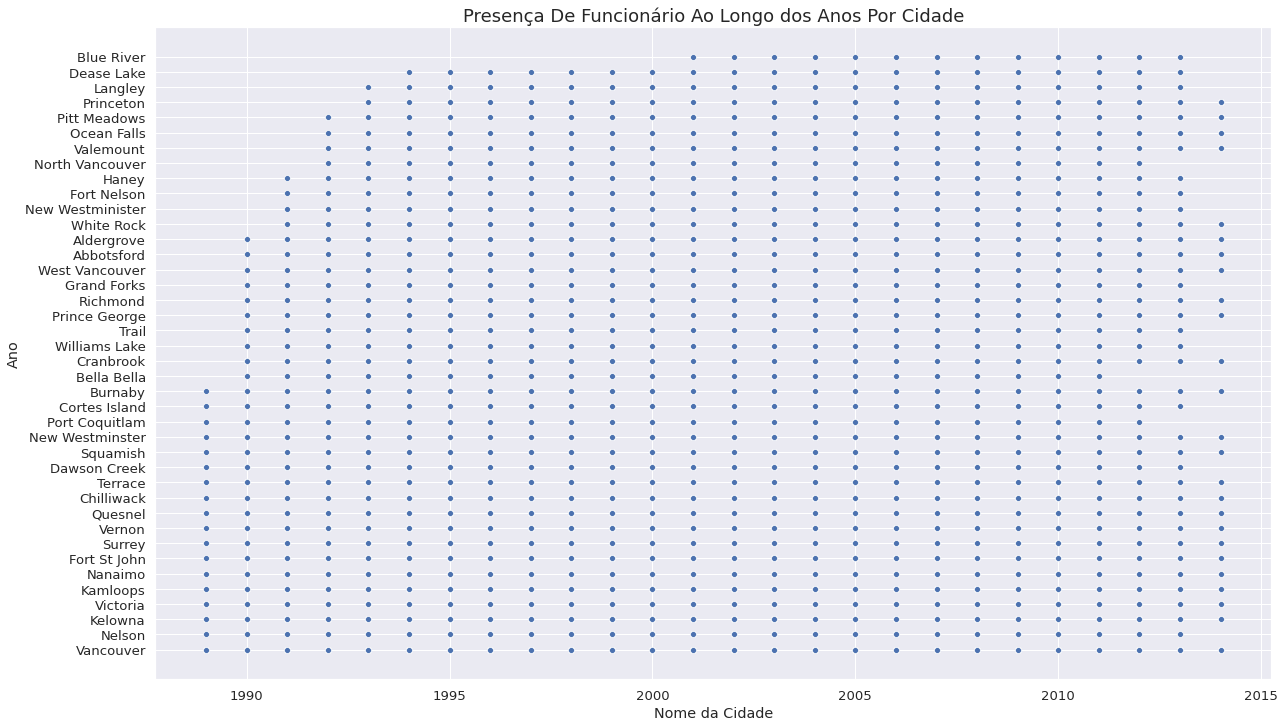

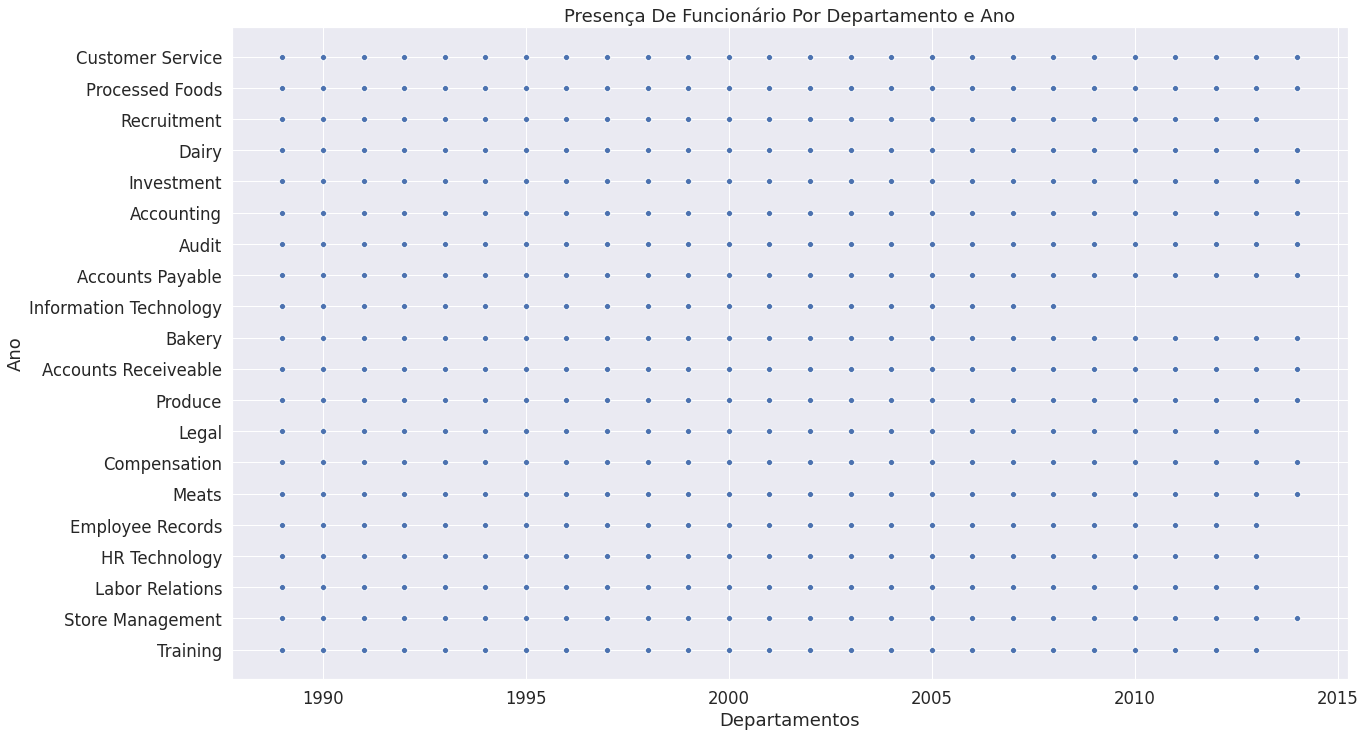

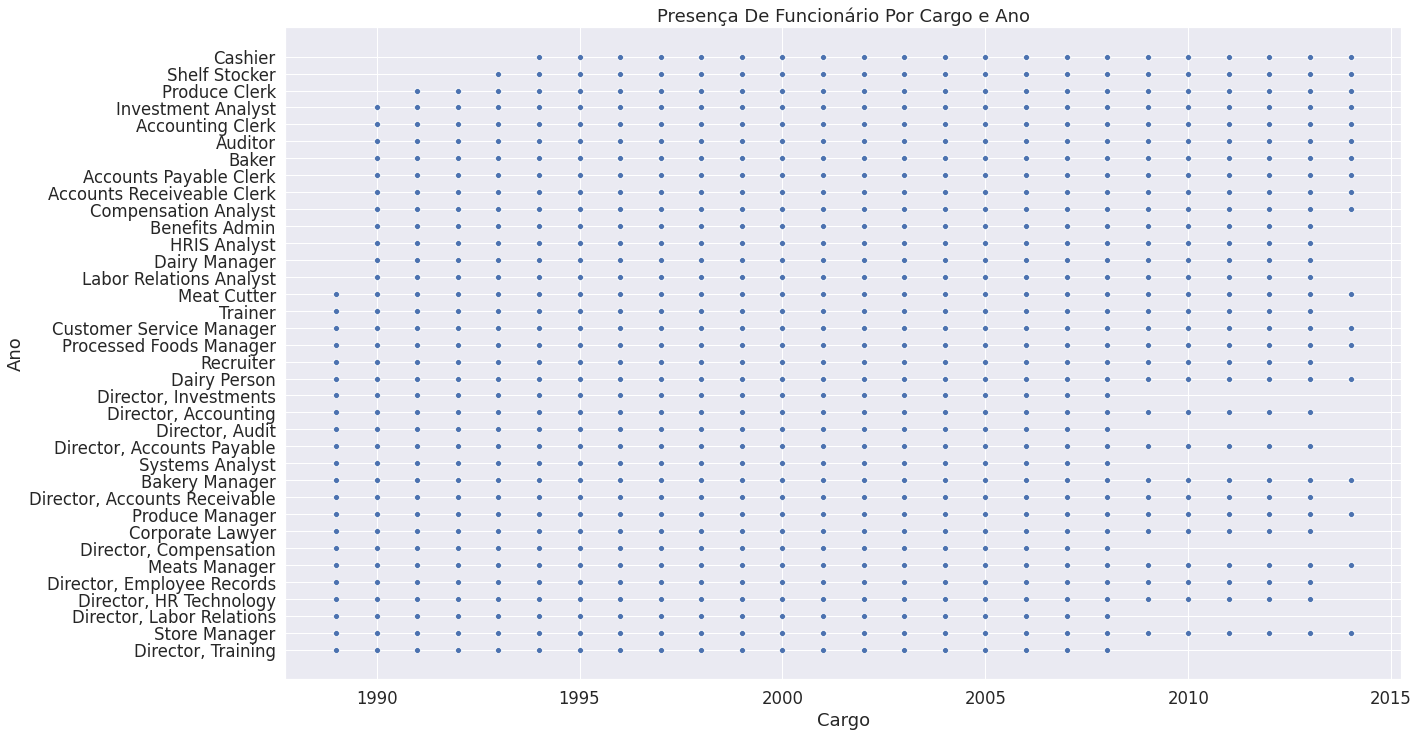

In [24]:
for x in ['city_name','department_name','job_title']:
    plt.figure(figsize=(20,12))
    sns.scatterplot(x='year',y=x, data=dl[dl['Value']== True])
    sns.set(font_scale=1.5)
    plt.ylabel("Ano")
    if(x == 'city_name'):
        plt.xlabel('Nome da Cidade')
        plt.title('Presença De Funcionário Ao Longo dos Anos Por Cidade')
        plt.savefig('plot18A.png')
    elif(x == 'department_name'):
        plt.xlabel('Departamentos')
        plt.title('Presença De Funcionário Por Departamento e Ano')
        plt.savefig('plot18B.png')
    else:
        plt.xlabel('Cargo')
        plt.title('Presença De Funcionário Por Cargo e Ano')
        plt.savefig('plot18C.png')
    

<br><strong><font size="3">5.</font></strong>
<font size="3">Realizando Análises Com o Auxílio de Algoritmos de Machine Learning</font><br>

<ul><strong><font size="3.5">5.1. </font></strong>
<font size="3.5">Realizar Análises Com Aprendizagem de Máquina Não-Supervisionado, Sendo Entre os Algoritmos Mais Indicados Para Essa Análise o  <i>K-Nearest Neighbors Algorithm</i>.</font></ul>

<ul><font size="3"><strong>Objetivo</strong>: Fazer uma análise classificatória para identificar a divisão presente entre as unidades.</font></ul>

<ul><font size="3"><strong>Análise</strong>: Diante do quadro e o gráfico localizados abaixo, se faz possível saber que:</font></ul>

<ul><ul><font size="3">-De acordo o gráfico o menor índice de erros se deu quando o valor de k foi 3, que forneceu um estimativa de acerto de 98,91% dos dados, facilmente aplicado em outras variáveis de forma semelhante.</font> </ul></ul>



In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score


Text(0.5, 1.0, 'Taxa de erro vs Valor K')

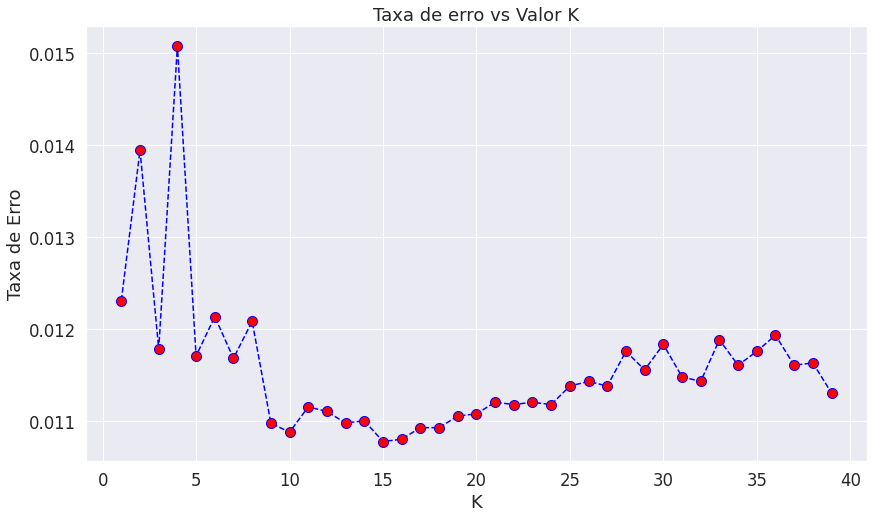

In [26]:
scaler = StandardScaler()
for x in ['age', 'length_of_service','year_of_contracting',
       'year_of_contratation', 'age_of_contratation', 
       'year_of_demission', 'month_of_demission']:
    for y in range(len(df[x])):
        if (pd.notna(df.loc[y,x]) == False):
            df.loc[y,x] = int(df[x].mean())
            #print(df[x].mean())
scaler.fit(df[['age', 'length_of_service','year_of_contracting',
       'year_of_contratation', 'age_of_contratation', 
       'year_of_demission', 'month_of_demission']])

parametros_padronizados = scaler.transform(df[['age', 'length_of_service','year_of_contracting',
       'year_of_contratation', 'age_of_contratation',
       'year_of_demission', 'month_of_demission']])

df_params = pd.DataFrame(parametros_padronizados,columns=['age', 'length_of_service','year_of_contracting',
       'year_of_contratation', 'age_of_contratation', 
       'year_of_demission', 'month_of_demission'])


            
xtrain,xtest,ytrain,ytest = train_test_split(df_params,df['BUSINESS_UNIT'],test_size=0.8)

taxa_erro = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred = knn.predict(xtest)
    taxa_erro.append(np.mean(pred!=ytest))
    
plt.figure(figsize=(14,8))
plt.plot(range(1,40),taxa_erro,color='blue',linestyle='dashed',marker='o',markersize=10, markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
plt.title('Taxa de erro vs Valor K')


In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)

print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))
print('\n')
print(accuracy_score(ytest,pred))
print('\n')

[[  220   243]
 [  225 39035]]


              precision    recall  f1-score   support

  HEADOFFICE       0.49      0.48      0.48       463
      STORES       0.99      0.99      0.99     39260

    accuracy                           0.99     39723
   macro avg       0.74      0.73      0.74     39723
weighted avg       0.99      0.99      0.99     39723



0.9882184125066082


